# <font color=white><center><span style='background:#124080'> PROJECT FA4 </span></center> </font>

<font color=blue>We are provided with a dataset of Neutritional Facts on which we are performing necessary cleaning, EDA and building various Machine learning Models.
Python Libraries used for this project are-


- Pandas                  :  For data handling, manipulation and analysis
- Matplotlib              :  For data visualization and analysis
- Seaborn                 :  For Data visualization and analysis
- Numpy                   :  For various Mathematical operations
- Sklearn.linear_model    :  For implementing various models
- Plotly                  :  For online graphing tools for individuals and collaboration
- Plotly.express          :  For high level interaction with graphs
- scipy.stats             :  For scientific computations as statistics with utility functions
- sklearn                  :  For implementing machine learning algorithms
- statsmodels.formula.api :  Used for statistical models mainly works on strings and dataframes
- autoviz                 :  Performing automatic visualization of a dataset

# <font color=white><center><span style='background:#124080'> Initial Insights From Data </span></center> </font>


### <font color=blue> Importing necessary Libraries:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly
import plotly.express as px
from scipy.stats import chi2,chi2_contingency
import scipy.stats as stats
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metric
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### <font color=blue> Reading dataset 

In [2]:
neutrients=pd.read_csv("neutrional facts.csv")
neutrients.head() 

Category                              Item    Serving Size Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)      300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)      250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)      370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)      450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)      400   

  Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0               120       13.0                         20            5.0   
1                70        8.0                         12            3.0   
2               200       23.0                         35            8.0   
3               250       28.0                         43           10.0   
4               210       23.0                         35            8.0   

  Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                            25        0.0  ...             31   
1                            15        0.0  ...             30   
2                            42        0.0  ...             29   
3                            52        0.0  ...             30   
4                            42        0.0  ...             30   

   Carbohydrates (% Daily Value) Dietary Fiber  Dietary Fiber (% Daily Value)  \
0                             10             4                             17   
1                             10             4                             17   
2                             10             4                             17   
3                             10             4                             17   
4                             10             4                             17   

   Sugars  Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
0       3       17                         10                          0   
1       3       18                          6                          0   
2       2       14                          8                          0   
3       2       21                         15                          0   
4       2       21                          6                          0   

   Calcium (% Daily Value)  Iron (% Daily Value)  
0                       25                    15  
1                       25                     8  
2                       25                    10  
3                       30                    15  
4                       25                    10  

[5 rows x 24 columns]

### <font color=blue> Using pandas info and describe functions to gain knowledge about data type of columns, Null values, and to understand distribution of data

In [3]:
neutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         260 non-null object
Calories from Fat                260 non-null object
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    260 non-null object
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           260 non-null object
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null int6

In [4]:
neutrients.describe().T

count       mean        std  min     25%   50%  \
Total Fat                      260.0  14.165385  14.205998  0.0   2.375  11.0   
Total Fat (% Daily Value)      260.0  21.815385  21.885199  0.0   3.750  17.0   
Saturated Fat                  260.0   6.007692   5.321873  0.0   1.000   5.0   
Trans Fat                      260.0   0.203846   0.429133  0.0   0.000   0.0   
Cholesterol                    260.0  54.942308  87.269257  0.0   5.000  35.0   
Cholesterol (% Daily Value)    260.0  18.392308  29.091653  0.0   2.000  11.0   
Sodium (% Daily Value)         260.0  20.676923  24.034954  0.0   4.750   8.0   
Carbohydrates                  260.0  47.346154  28.252232  0.0  30.000  44.0   
Carbohydrates (% Daily Value)  260.0  15.780769   9.419544  0.0  10.000  15.0   
Dietary Fiber                  260.0   1.630769   1.567717  0.0   0.000   1.0   
Dietary Fiber (% Daily Value)  260.0   6.530769   6.307057  0.0   0.000   5.0   
Sugars                         260.0  29.423077  28.679797  0.0   5.750  17.5   
Protein                        260.0  13.338462  11.426146  0.0   4.000  12.0   
Vitamin C (% Daily Value)      260.0   8.534615  26.345542  0.0   0.000   0.0   
Calcium (% Daily Value)        260.0  20.973077  17.019953  0.0   6.000  20.0   

                                 75%    max  
Total Fat                      22.25  118.0  
Total Fat (% Daily Value)      35.00  182.0  
Saturated Fat                  10.00   20.0  
Trans Fat                       0.00    2.5  
Cholesterol                    65.00  575.0  
Cholesterol (% Daily Value)    21.25  192.0  
Sodium (% Daily Value)         36.25  150.0  
Carbohydrates                  60.00  141.0  
Carbohydrates (% Daily Value)  20.00   47.0  
Dietary Fiber                   3.00    7.0  
Dietary Fiber (% Daily Value)  10.00   28.0  
Sugars                         48.00  128.0  
Protein                        19.00   87.0  
Vitamin C (% Daily Value)       4.00  240.0  
Calcium (% Daily Value)        30.00   70.0

## <font color=white><center><span style='background:#024080'> Following Inferences are drawn from info and describe functions </span></center> </font>

<font color=blue>

- We have 260 rows and 24 columns 
- Data types of columns 
  - 3 are float type, 
  - 12 are integer type,
  - 9 are object type
- Data has no Null values in it 
- Mean, standard deviation and values of various quartiles are calculated in describe method
- There are three columns containing character type values i.e, Category, Item, Serving Size data but some columns containing numerical data are also of character types, so we have to convert them into numerical type i.e, integer or float

### <font color=blue> Further Exploring Category column:-

#### <font color=blue> Checking unique Categories and their count

In [5]:
unique_categories=neutrients["Category"].unique()
print("Number of Unique categories =",len(unique_categories))

Number of Unique categories = 9


In [6]:
neutrients["Category"].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

#### <font color=blue> Plotting a count plot for checking count of vairous categories graphically

In [7]:
barchart=px.bar(data_frame=neutrients,x="Category",opacity=0.9,orientation="v",color="Category")
barchart.show()

# <font color=white><center><span style='background:#124080'> Exploratory Data Analysis </span></center> </font>
<!-- # <font color=orange><center> **Exploratory Data Analysis** </center> </font> -->

### <font color=blue> Checking for columns containing missing values

In [8]:
missing_value_columns=[]
for i in neutrients:
    for x in  ["?"," ","-","Nan","v"]:
        if x in list(neutrients[i]):
            missing_value_columns.append(i)
            break
for i in missing_value_columns:
    print(i)

Calories
Calories from Fat
Saturated Fat (% Daily Value)
Sodium
Vitamin A (% Daily Value)
Iron (% Daily Value)



### <font color=blue> The output of above cell is showing columns having missing values </font>

#### <font color=blue> Replacing missing values with np.nan and then checking their counts

In [9]:
for i in missing_value_columns:
    neutrients[i].replace(['?',' ','-','Nan','v'], np.nan, inplace=True)

In [10]:
neutrients.isnull().sum()

Category                          0
Item                              0
Serving Size                      0
Calories                         11
Calories from Fat                 2
Total Fat                         0
Total Fat (% Daily Value)         0
Saturated Fat                     0
Saturated Fat (% Daily Value)     6
Trans Fat                         0
Cholesterol                       0
Cholesterol (% Daily Value)       0
Sodium                           15
Sodium (% Daily Value)            0
Carbohydrates                     0
Carbohydrates (% Daily Value)     0
Dietary Fiber                     0
Dietary Fiber (% Daily Value)     0
Sugars                            0
Protein                           0
Vitamin A (% Daily Value)         2
Vitamin C (% Daily Value)         0
Calcium (% Daily Value)           0
Iron (% Daily Value)              8
dtype: int64

#### <font color=blue> The output of above cell shows count of null values in columns after replacing missing values with NAN </font>

#### <font color=blue> Converting columns to numeric type that is integer or float

In [11]:
for i in neutrients.columns:
    if i not in ['Category',"Item","Serving Size"]:
        neutrients[i]=pd.to_numeric(neutrients[i])

In [12]:
neutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
Category                         260 non-null object
Item                             260 non-null object
Serving Size                     260 non-null object
Calories                         249 non-null float64
Calories from Fat                258 non-null float64
Total Fat                        260 non-null float64
Total Fat (% Daily Value)        260 non-null int64
Saturated Fat                    260 non-null float64
Saturated Fat (% Daily Value)    254 non-null float64
Trans Fat                        260 non-null float64
Cholesterol                      260 non-null int64
Cholesterol (% Daily Value)      260 non-null int64
Sodium                           245 non-null float64
Sodium (% Daily Value)           260 non-null int64
Carbohydrates                    260 non-null int64
Carbohydrates (% Daily Value)    260 non-null int64
Dietary Fiber                    260 non-null 

### <font color=blue> Now from the above info command we can see that we have 3 categorical columns and 21 numerical columns(12 int and 9 float)  </font>

### <font color=blue> Encoding Serving Size for preprocessing

In [13]:
def extract(x):
    x=x.split()
    oz=x[0]
    return(float(oz))
neutrients["Serving Size"]=neutrients["Serving Size"].apply(extract)

In [14]:
neutrients["Serving Size"]

0       4.8
1       4.8
2       3.9
3       5.7
4       5.7
       ... 
255    10.1
256    13.4
257     6.7
258    14.2
259     7.1
Name: Serving Size, Length: 260, dtype: float64

## <font color=blue> Imputing Missing Values using Linear Regression 

In [15]:
corr_df=neutrients.corr()

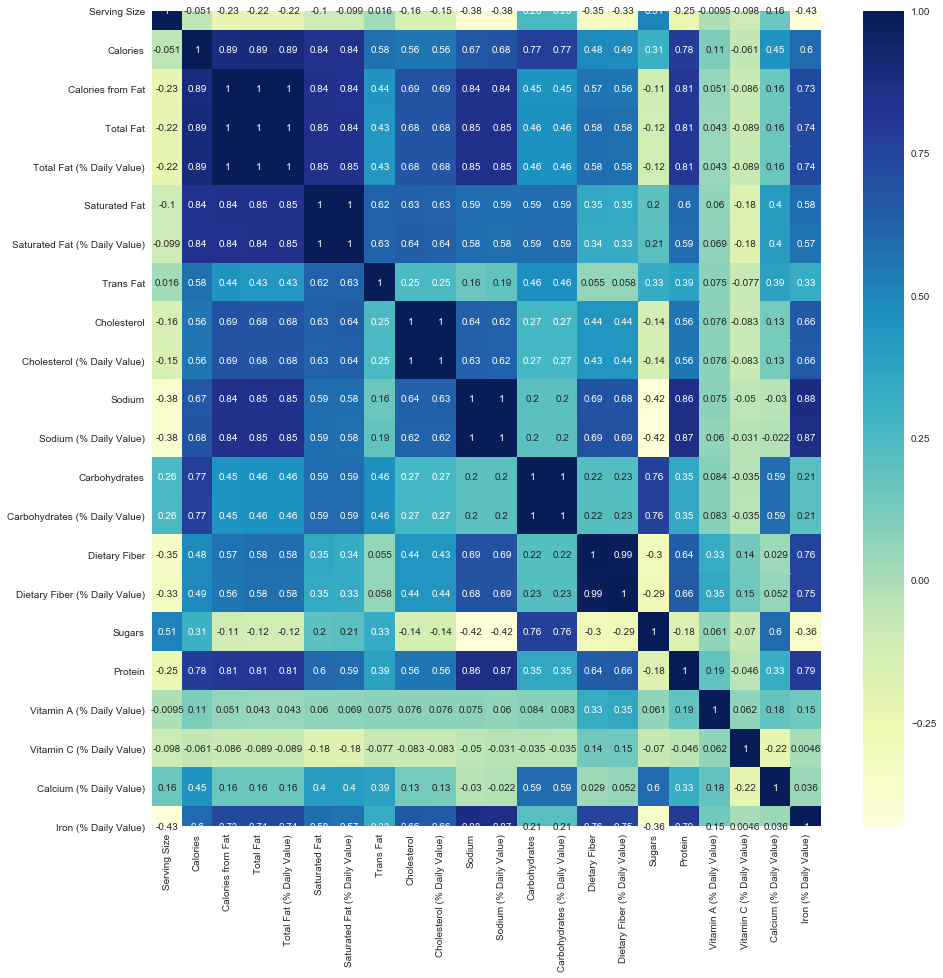

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_df,cmap="YlGnBu",annot=True)

In [17]:
values_highly_corrlated={"Calories":["Protein","Carbohydrates (% Daily Value)",'Carbohydrates','Saturated Fat', 'Total Fat','Total Fat (% Daily Value)'],"Calories from Fat":['Total Fat', 'Total Fat (% Daily Value)','Saturated Fat','Sodium (% Daily Value)','Protein'],"Saturated Fat (% Daily Value)":['Total Fat', 'Total Fat (% Daily Value)','Saturated Fat'],"Sodium":['Total Fat', 'Total Fat (% Daily Value)','Sodium (% Daily Value)'],'Vitamin A (% Daily Value)':['Trans Fat', 'Cholesterol','Carbohydrates', 'Carbohydrates (% Daily Value)'],'Iron (% Daily Value)':['Total Fat', 'Total Fat (% Daily Value)','Sodium (% Daily Value)','Dietary Fiber', 'Dietary Fiber (% Daily Value)']}

In [18]:
prediction_imputer={}
location_of_null={}
a=0
for i in values_highly_corrlated:
    y=i
    x=values_highly_corrlated[i]
    location_of_null[y]=neutrients.loc[neutrients[y].isnull(),y].index
    neutrients[y].fillna(0,inplace=True)
    model_imputer=LinearRegression()
    model_imputer.fit(neutrients[x],neutrients[y])
    prediction_imputer[y]=model_imputer.predict(neutrients[x])
    print("Accuracy for predicting",y,model_imputer.score(neutrients[x],neutrients[y]))
    a=a+1
    

Accuracy for predicting Calories 0.6992998548044829
Accuracy for predicting Calories from Fat 0.946626989439396
Accuracy for predicting Saturated Fat (% Daily Value) 0.8984918422519373
Accuracy for predicting Sodium 0.8184077468893984
Accuracy for predicting Vitamin A (% Daily Value) 0.011861285162049207
Accuracy for predicting Iron (% Daily Value) 0.7432511341392298


### <font color=blue> The above cell is predicting values using Linear Regression and showing accuracy of prediction
.  </font>

In [19]:
print(location_of_null)

{'Calories': Int64Index([8, 16, 17, 18, 31, 32, 33, 54, 55, 56, 57], dtype='int64'), 'Calories from Fat': Int64Index([34, 39], dtype='int64'), 'Saturated Fat (% Daily Value)': Int64Index([20, 33, 51, 52, 53, 54], dtype='int64'), 'Sodium': Int64Index([44, 45, 46, 61, 62, 63, 68, 69, 70, 78, 79, 91, 92, 105, 106], dtype='int64'), 'Vitamin A (% Daily Value)': Int64Index([70, 71], dtype='int64'), 'Iron (% Daily Value)': Int64Index([67, 68, 69, 83, 84, 85, 97, 98], dtype='int64')}


### <font color=blue> The output of above cell shows index where there were null values in columns </font>

In [20]:
for i in location_of_null:
    neutrients[i].iloc[location_of_null[i]]=prediction_imputer[i][location_of_null[i]]

### <font color=blue> The above cell is imputing values to places where there were there were nulls in columns </font>

### <font color=blue> Inference from above code:

#### <font color=blue> <li>We have successfully imputed the missing values using Linear Regression

In [21]:
neutrients.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

### <font color=blue> The output of the above cell shows there are no missing values </font>

# <font color=white><center><span style='background:#124080'> Handling outliers </span></center> </font>

In [22]:
fig = px.box(pd.melt(neutrients), x="variable", y="value", points="outliers")
fig.show()

In [23]:
for col in neutrients.drop(columns=["Item","Category","Trans Fat"]):
    
    # Calculating values of Q1, Q3 and IQR
    Q1 = neutrients.describe()[col].loc['25%']
    Q3 = neutrients.describe()[col].loc['75%']
    IQR = Q3 - Q1    

    neutrients[col].where( ~((neutrients[col] < (Q1 - 1.5 * IQR)) | (neutrients[col] > (Q3 + 1.5 * IQR))), np.NaN, inplace=True )
    neutrients.fillna(neutrients[col].median(), inplace=True)

In [24]:
fig = px.box(pd.melt(neutrients), x="variable", y="value", points="outliers")
fig.show()

### <font color=blue>In Outliers handling we are omitting values which exceed our upper and lower limit </font>

<font color=blue>

- Upper Limit=Q3+1.5*IQR    
- Lower Limit=Q1-1.5*IQR
- Any value above Upper Limit and any value below Lower limit is removed by codes above for outliers handling

# <font color=white><center><span style='background:#124080'> Statistical Tests </span></center> </font>
<!-- ## Statistical Tests -->

### <font color=blue>Statistical test between Category and Item

#### <font color=blue> Since both Category and Item are categorical columns we are using <b>'Chi-squared'</b> test for checking association between them

In [25]:
two_way_table=pd.crosstab(columns=neutrients["Category"],index=neutrients["Item"])
two_way_table

Category                       Beef & Pork  Beverages  Breakfast  \
Item                                                               
1% Low Fat Milk Jug                      0          1          0   
Apple Slices                             0          0          0   
Bacon Buffalo Ranch McChicken            0          0          0   
Bacon Cheddar McChicken                  0          0          0   
Bacon Clubhouse Burger                   1          0          0   
...                                    ...        ...        ...   
Sweet Tea (Medium)                       0          0          0   
Sweet Tea (Small)                        0          0          0   
Vanilla Shake (Large)                    0          0          0   
Vanilla Shake (Medium)                   0          0          0   
Vanilla Shake (Small)                    0          0          0   

Category                       Chicken & Fish  Coffee & Tea  Desserts  Salads  \
Item                                                                            
1% Low Fat Milk Jug                         0             0         0       0   
Apple Slices                                0             0         0       0   
Bacon Buffalo Ranch McChicken               1             0         0       0   
Bacon Cheddar McChicken                     1             0         0       0   
Bacon Clubhouse Burger                      0             0         0       0   
...                                       ...           ...       ...     ...   
Sweet Tea (Medium)                          0             1         0       0   
Sweet Tea (Small)                           0             1         0       0   
Vanilla Shake (Large)                       0             0         0       0   
Vanilla Shake (Medium)                      0             0         0       0   
Vanilla Shake (Small)                       0             0         0       0   

Category                       Smoothies & Shakes  Snacks & Sides  
Item                                                               
1% Low Fat Milk Jug                             0               0  
Apple Slices                                    0               1  
Bacon Buffalo Ranch McChicken                   0               0  
Bacon Cheddar McChicken                         0               0  
Bacon Clubhouse Burger                          0               0  
...                                           ...             ...  
Sweet Tea (Medium)                              0               0  
Sweet Tea (Small)                               0               0  
Vanilla Shake (Large)                           1               0  
Vanilla Shake (Medium)                          1               0  
Vanilla Shake (Small)                           1               0  

[260 rows x 9 columns]

<font color=blue>

STEP 1 
Defining Null and Alternate hypothesis
- H0 -Category and Items are independent
- Ha -Category and Items are dependent

<font color=blue>

STEP 2
 Selecting a significance level
- We are using .05 as significance level

<font color=blue>

STEP 3
 Identification of degree of freedom
 - Degree of freedom =(No of rows-1) * (No of columns-1)
 - Here we have 260 rows and 9 columns so Degree of freedom=(260-1) * (9-1) = 2072

<font color=blue>

STEP 4
 - Finding critical value for given significance level

In [26]:
critical_value=chi2.ppf(1-.05,2072)
critical_value

2179.0104338585743

<font color=blue>

STEP 5
- Computing the chi2 statistics

In [27]:
chi2_contingency(two_way_table)

(2080.0,
 0.446516475291391,
 2072,
 array([[0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ],
        [0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ],
        [0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ],
        ...,
        [0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ],
        [0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ],
        [0.05769231, 0.10384615, 0.16153846, ..., 0.02307692, 0.10769231,
         0.05      ]]))

<font color=blue>

In output of chi2_contingency above
- First value is chi2_statistics
- Second value is P-value
 . Now as our chi2_statistics is less than critical value this means that our null hypothesis is failed to reject
This implies that Ho is true and category and Item are independent


### <font color=blue> Since from above we can see that our pvalue is greater than .05 so we can say that null hypothesis is failed to reject  </font>

#### <font color=blue> Creating a stacked bar chart for category and item

In [28]:
barchart=px.bar(data_frame=neutrients,x="Category",opacity=0.9,orientation="v",color="Item")
barchart.show()

### <font color=blue> Statistical test between total fat and Category

In [29]:
le=preprocessing.LabelEncoder()
neutrients["label_Encoded_Categories"]=le.fit_transform(neutrients["Category"])
neutrients["Total_fat"]=neutrients["Total Fat"]

In [30]:
poly_model=smf.ols(formula="label_Encoded_Categories~Total_fat",data=neutrients).fit()

In [31]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     label_Encoded_Categories   R-squared:                       0.025
Model:                                  OLS   Adj. R-squared:                  0.021
Method:                       Least Squares   F-statistic:                     6.625
Date:                      Fri, 30 Jul 2021   Prob (F-statistic):             0.0106
Time:                              10:13:43   Log-Likelihood:                -556.96
No. Observations:                       260   AIC:                             1118.
Df Residuals:                           258   BIC:                             1125.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0006      0.194     20.647      0.000       3.619       4.382
Total_fat     -0.0283      0.011     -2.574      0.011      -0.050      -0.007
==============================================================================
Omnibus:                        7.085   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.218
Skew:                           0.384   Prob(JB):                       0.0271
Kurtosis:                       2.722   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blue> From above output we can observe the summary of test between Category and Total Fat </font>

#### <font color=blue> Creating a bar chart between Category and Total Fat 

In [32]:
barchart=px.bar(data_frame=neutrients,x="Category",opacity=0.9,orientation="v",color="Total Fat")
barchart.show()

### <font color=blue> Statistical test between Item and Protein

<font color=blue>
    - Firstly we are using label encoder to encode Items

In [33]:
le=preprocessing.LabelEncoder()
neutrients["label_Encoded_Items"]=le.fit_transform(neutrients["Item"])

<font color=blue>

- Now we are using ols to check statistical relation between Item and Protein

In [34]:
poly_model=smf.ols(formula="label_Encoded_Items~Protein",data=neutrients).fit()

In [35]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     label_Encoded_Items   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5003
Date:                 Fri, 30 Jul 2021   Prob (F-statistic):              0.480
Time:                         10:13:44   Log-Likelihood:                -1491.4
No. Observations:                  260   AIC:                             2987.
Df Residuals:                      258   BIC:                             2994.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.2914      7.563     16.567      0.000     110.399     140.184
Protein        0.3291      0.465      0.707      0.480      -0.587       1.245
==============================================================================
Omnibus:                       89.080   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.852
Skew:                          -0.031   Prob(JB):                     0.000982
Kurtosis:                       1.871   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blue> From above output we can observe the summary of test between Item and Protein </font>

### <font color=blue>Statistical test between Item and Sugars

<font color=blue>

- Now we are using ols to check statistical relation between Item and Protein

In [36]:
poly_model=smf.ols(formula='label_Encoded_Items ~ Sugars',data=neutrients).fit()

In [37]:
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     label_Encoded_Items   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.828
Date:                 Fri, 30 Jul 2021   Prob (F-statistic):              0.178
Time:                         10:13:45   Log-Likelihood:                -1490.7
No. Observations:                  260   AIC:                             2985.
Df Residuals:                      258   BIC:                             2993.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.8255      6.786     18.100      0.000     109.463     136.188
Sugars         0.2400      0.177      1.352      0.178      -0.110       0.589
==============================================================================
Omnibus:                      186.003   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.010
Skew:                           0.032   Prob(JB):                     0.000202
Kurtosis:                       1.749   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blue> From above output we can observe summary of test between Item and Sugars </font>

# <font color=white><center><span style='background:#124080'> Distribution of Calories across various menus </span></center> </font>

<!-- ## Distribution of Calories across various menus -->

In [38]:
neutrients
by_category = pd.DataFrame({'Category':neutrients['Category'].value_counts().index.tolist(),
                            'Count':neutrients['Category'].value_counts().tolist(),
                            'Calories (Sum)':neutrients[['Category','Calories']].groupby('Category').sum()['Calories'],
                            'Calories (Mean)':neutrients[['Category','Calories']].groupby('Category').mean()['Calories']})
by_category.reset_index(drop = True)

Category  Count  Calories (Sum)  Calories (Mean)
0        Coffee & Tea     95     7202.643239       480.176216
1           Breakfast     42     3070.000000       113.703704
2  Smoothies & Shakes     28    19451.757224       463.137077
3           Beverages     27    12761.374634       472.643505
4      Chicken & Fish     27    26970.000000       283.894737
5         Beef & Pork     15     1555.000000       222.142857
6      Snacks & Sides     13     1620.000000       270.000000
7            Desserts      7    14285.000000       510.178571
8              Salads      6     3195.000000       245.769231

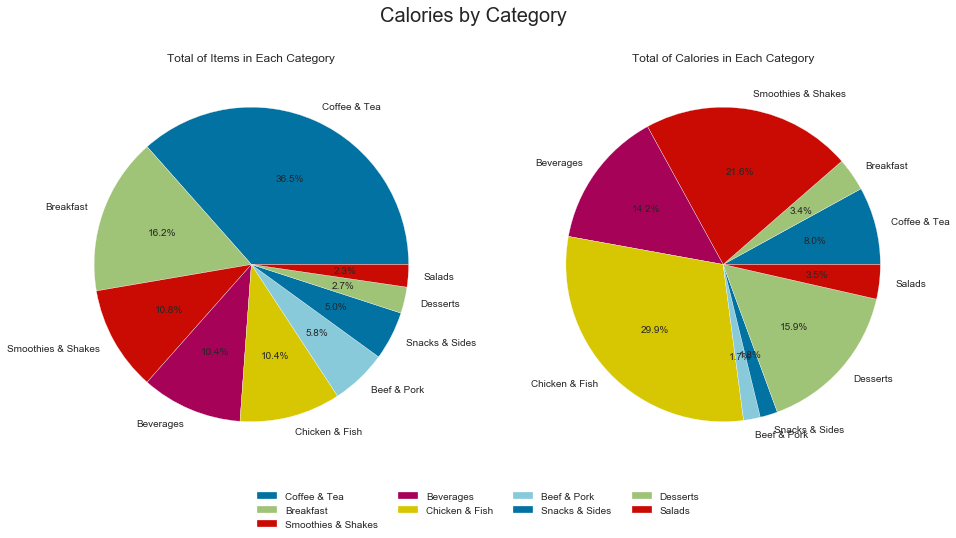

In [39]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15.5, 7.5)
ax1.set_title("Total of Items in Each Category")
ax1.pie(by_category['Count'],labels =by_category['Category'],autopct = '%1.1f%%')

ax2.set_title("Total of Calories in Each Category")
ax2.pie(by_category['Calories (Sum)'],labels =by_category['Category'],autopct = '%1.1f%%')

fig.suptitle('Calories by Category',fontsize = 20)
fig.legend(by_category['Category'],ncol=4,loc=8)


<font color=blue>

-  Categories having the most calories are:
 - "Chicken & Fish"
 - "Smoothies & Shakes"
 - "Beverages"
 - "Beef & Pork"
- Categories having the least calories are:
 - Coffee & Tea"
 - "Salads"
 - "Snacks & Sides"
 - "Desserts"
 - "Breakfast"

### <font color=blue> Calories distribution For smoothies and shakes

In [40]:
SmoothShakes = neutrients[neutrients["Category"] == "Smoothies & Shakes"]
SmoothShakes = SmoothShakes.sort_values("Calories", ascending = False)

In [41]:
barchart=px.bar(data_frame=SmoothShakes,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Chicken and Fish

In [42]:
Chicken_and_fish= neutrients[neutrients["Category"] == "Chicken & Fish"]
Chicken_and_fish = Chicken_and_fish.sort_values("Calories", ascending = False)

In [43]:
barchart=px.bar(data_frame=Chicken_and_fish,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Beverages

In [44]:
Beverages= neutrients[neutrients["Category"] == "Beverages"]
Beverages = Beverages.sort_values("Calories", ascending = False)

In [45]:
barchart=px.bar(data_frame=Beverages,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Beef & Pork

In [46]:
Beef_and_Pork= neutrients[neutrients["Category"] == "Beef & Pork"]
Beef_and_Pork =Beef_and_Pork.sort_values("Calories", ascending = False)

In [47]:
barchart=px.bar(data_frame=Beef_and_Pork,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Coffee and Tea

In [49]:
coffee_and_tea = neutrients[neutrients["Category"] == "Coffee & Tea"]
coffee_and_tea = coffee_and_tea.sort_values("Calories", ascending = False)

In [50]:
barchart=px.bar(data_frame=coffee_and_tea,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Salads

In [51]:
Salads = neutrients[neutrients["Category"] == "Salads"]
Salads = Salads.sort_values("Calories", ascending = False)

In [52]:
barchart=px.bar(data_frame=Salads,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Snacks & Sides

In [53]:
Snacks_and_Sides = neutrients[neutrients["Category"] == "Snacks & Sides"]
Snacks_and_Sides = Snacks_and_Sides.sort_values("Calories", ascending = False)

In [54]:
barchart=px.bar(data_frame=Snacks_and_Sides,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For Desserts

In [55]:
Desserts = neutrients[neutrients["Category"] == "Desserts"]
Desserts = Desserts.sort_values("Calories", ascending = False)

In [56]:
barchart=px.bar(data_frame=Desserts,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

### <font color=blue> Calories distribution For  Breakfast

In [57]:
Breakfast = neutrients[neutrients["Category"] == "Breakfast"]
Breakfast = Breakfast.sort_values("Calories", ascending = False)

In [58]:
barchart=px.bar(data_frame=Breakfast,x="Item",y="Calories",opacity=0.9,orientation="v",color="Calories")
barchart.show()

# <font color=white><center><span style='background:#124080'> Calories based on Serving Size seprately for drinks and food </span></center> </font>
<!-- ## Calories based on Serving Size seprately for drinks and food -->

<font color=blue>

- Drinks include following Categories
 - Smoothies & Shakes
 - Coffee & Tea
 - Beverages

In [59]:
SmoothShakes = neutrients[neutrients["Category"] == "Smoothies & Shakes"]
Beverages= neutrients[neutrients["Category"] == "Beverages"]
coffe_and_tea = neutrients[neutrients["Category"] == "Coffee & Tea"]

In [60]:
drinks=pd.concat([SmoothShakes,Beverages,coffe_and_tea])
drinks

Category                                     Item  \
232  Smoothies & Shakes   Blueberry Pomegranate Smoothie (Small)   
233  Smoothies & Shakes  Blueberry Pomegranate Smoothie (Medium)   
234  Smoothies & Shakes   Blueberry Pomegranate Smoothie (Large)   
235  Smoothies & Shakes       Strawberry Banana Smoothie (Small)   
236  Smoothies & Shakes      Strawberry Banana Smoothie (Medium)   
..                  ...                                      ...   
227        Coffee & Tea                  Frappé Caramel (Medium)   
228        Coffee & Tea                   Frappé Caramel (Large)   
229        Coffee & Tea            Frappé Chocolate Chip (Small)   
230        Coffee & Tea           Frappé Chocolate Chip (Medium)   
231        Coffee & Tea            Frappé Chocolate Chip (Large)   

     Serving Size  Calories  Calories from Fat  Total Fat  \
232          12.0     220.0                5.0        0.5   
233          16.0     260.0                5.0        1.0   
234          22.0     340.0               10.0        1.0   
235          12.0     210.0                5.0        0.5   
236          16.0     250.0                5.0        1.0   
..            ...       ...                ...        ...   
227          16.0     550.0              200.0       23.0   
228          22.0     670.0              250.0       27.0   
229          12.0     530.0              200.0       23.0   
230          16.0     630.0              240.0       26.0   
231          22.0     760.0              280.0       31.0   

     Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
232                        1.0            0.0                            0.0   
233                        1.0            0.0                            0.0   
234                        2.0            0.5                            3.0   
235                        1.0            0.0                            0.0   
236                        1.0            0.0                            0.0   
..                         ...            ...                            ...   
227                       35.0           15.0                           73.0   
228                       42.0           17.0                           87.0   
229                       35.0           14.0                           72.0   
230                       41.0           17.0                           85.0   
231                       48.0           20.0                          101.0   

     Trans Fat  ...  Dietary Fiber (% Daily Value)  Sugars  Protein  \
232        0.0  ...                           12.0    44.0      2.0   
233        0.0  ...                           15.0    54.0      3.0   
234        0.0  ...                           19.0    70.0      4.0   
235        0.0  ...                           10.0    44.0      3.0   
236        0.0  ...                           13.0    54.0      4.0   
..         ...  ...                            ...     ...      ...   
227        1.0  ...                            0.0    71.0      9.0   
228        1.5  ...                            0.0    88.0     11.0   
229        1.0  ...                            5.0    67.0      8.0   
230        1.0  ...                            5.0    81.0      9.0   
231        1.5  ...                            5.0    99.0     12.0   

     Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
232                        0.0                        2.0   
233                        0.0                        4.0   
234                        0.0                        4.0   
235                        0.0                        0.0   
236                        0.0                        0.0   
..                         ...                        ...   
227                       20.0                        0.0   
228                       20.0                        0.0   
229                       15.0                        0.0   
230                       15.0           

In [61]:
drink_group_serving_size=drinks.groupby("Serving Size").sum()
drink_group_serving_size

Calories  Calories from Fat  Total Fat  \
Serving Size                                           
1.0              230.0               20.0        2.5   
6.0               80.0                0.0        0.0   
6.7              340.0              100.0       11.0   
7.1              410.0              150.0       16.0   
7.3              430.0              140.0       15.0   
10.1             510.0              150.0       17.0   
10.9             650.0              210.0       23.0   
12.0           11370.0             2485.0      276.0   
13.4             690.0              200.0       23.0   
14.2             810.0              290.0       32.0   
16.0           12550.0             2790.0      315.0   
16.2             335.0              290.0       33.0   
16.9               0.0                0.0        0.0   
20.0            5880.0             1185.0      137.5   
21.0             770.0                0.0        0.0   
22.0            9270.0             2340.0      259.0   

              Total Fat (% Daily Value)  Saturated Fat  \
Serving Size                                             
1.0                                 4.0            1.5   
6.0                                 0.0            0.0   
6.7                                17.0            6.0   
7.1                                25.0            8.0   
7.3                                24.0           10.0   
10.1                               26.0            9.0   
10.9                               35.0           14.0   
12.0                              425.0          171.0   
13.4                               35.0           12.0   
14.2                               50.0           15.0   
16.0                              483.0          192.5   
16.2                               50.0           20.0   
16.9                                0.0            0.0   
20.0                              211.0           79.5   
21.0                                0.0            0.0   
22.0                              401.0          165.0   

              Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  \
Serving Size                                                          
1.0                                     8.0        0.0         15.0   
6.0                                     0.0        0.0          0.0   
6.7                                    29.0        0.0         30.0   
7.1                                    38.0        0.0         30.0   
7.3                                    48.0        0.0         35.0   
10.1                                   44.0        0.5         45.0   
10.9                                   72.0        0.5         50.0   
12.0                                  844.0        6.0        980.0   
13.4                                   58.0        1.0         55.0   
14.2                                   76.0        1.0         60.0   
16.0                                  969.0        8.0       1095.0   
16.2                                  102.0        1.0         75.0   
16.9                                    0.0        0.0          0.0   
20.0                                  386.0        1.5        470.0   
21.0                                    0.0        0.0          0.0   
22.0                                  819.0        9.0        925.0   

              Cholesterol (% Daily Value)  Sodium  ...  \
Serving Size                                       ...   
1.0                                   5.0   260.0  ...   
6.0                                   0.0    15.0  ...   
6.7                                   9.0   190.0  ...   
7.1                                  10.0   200.0  ...   
7.3                                  11.0   120.0  ...   
10.1                                 14.0   280.0  ...   
10.9                                 17.0   180.0  ...   
12.0                                335.0  4725.0  ...   
13.4                                 19.0   380.0  ...   
14.2                                 20.0  

In [62]:
px.scatter(x=drink_group_serving_size.index,y=drink_group_serving_size["Calories"])

<font color=blue>

- Food include following Categories
 - Breakfast
 - Beef & Pork
 - Chicken & Fish
 - Salads
 - Snacks & Sides
 - Desserts
  

In [63]:
Breakfast = neutrients[neutrients["Category"] == "Breakfast"]
Beef_and_Pork= neutrients[neutrients["Category"] == "Beef & Pork"]
Chicken_and_fish= neutrients[neutrients["Category"] == "Chicken & Fish"]
Salads = neutrients[neutrients["Category"] == "Salads"]
Snacks_and_Sides = neutrients[neutrients["Category"] == "Snacks & Sides"]
Desserts = neutrients[neutrients["Category"] == "Desserts"]

In [64]:
food=pd.concat([Breakfast,Beef_and_Pork,Chicken_and_fish,Salads,Snacks_and_Sides,Desserts])

In [65]:
food_group_serving_size=food.groupby("Serving Size").sum()

In [66]:
px.scatter(x=food_group_serving_size.index,y=food_group_serving_size["Calories"])

### <font color=blue> Calories based on serving size across all menu

In [67]:
neutrients_group_serving_size=neutrients.groupby("Serving Size").sum()

In [68]:
px.scatter(x=neutrients_group_serving_size.index,y=neutrients_group_serving_size["Calories"])

# <font color=white><center><span style='background:#124080'> Normality Test </span></center> </font>

<!-- ## Normality Test -->

In [69]:
#Normality test
#H0= The sample comes from a normal distribution.
#HA= The sample is not coming from a normal distribution.
Normality_df=pd.DataFrame()
dictionary={}
import scipy.stats as stats
for i in neutrients.columns.drop(["Category","Item"]):
    a,b=stats.shapiro(neutrients[i])
    if b<=.05:
        c="The null hypothesis can be rejected"
    else:
        c="Null hypothesis cannot be rejected"
    dictionary[i]=[a,b,c]
Normality_df=pd.DataFrame(dictionary,index=["test-statistic","p-value","Conclusion"])
Normality_df.T

test-statistic      p-value  \
Serving Size                        0.952761  1.81319e-07   
Calories                            0.978817  0.000645336   
Calories from Fat                   0.917071  7.79526e-11   
Total Fat                            0.91696  7.63847e-11   
Total Fat (% Daily Value)           0.917584  8.56938e-11   
Saturated Fat                        0.91432  4.72337e-11   
Saturated Fat (% Daily Value)       0.914914  5.25876e-11   
Trans Fat                           0.533308  9.34788e-26   
Cholesterol                         0.912297  3.29001e-11   
Cholesterol (% Daily Value)         0.915771  6.14443e-11   
Sodium                              0.790395   5.5971e-18   
Sodium (% Daily Value)              0.789275  5.02467e-18   
Carbohydrates                       0.980049   0.00104075   
Carbohydrates (% Daily Value)       0.979132  0.000728672   
Dietary Fiber                       0.859238  1.14836e-14   
Dietary Fiber (% Daily Value)       0.896942  2.49192e-12   
Sugars                              0.884673  3.79833e-13   
Protein                             0.934126  2.27634e-09   
Vitamin A (% Daily Value)           0.901465  5.17986e-12   
Vitamin C (% Daily Value)           0.442749  1.10902e-27   
Calcium (% Daily Value)             0.928464   7.0222e-10   
Iron (% Daily Value)                0.841635  1.31317e-15   
label_Encoded_Categories            0.922507  2.16785e-10   
Total_fat                            0.91696  7.63847e-11   
label_Encoded_Items                 0.954634  2.96775e-07   

                                                        Conclusion  
Serving Size                   The null hypothesis can be rejected  
Calories                       The null hypothesis can be rejected  
Calories from Fat              The null hypothesis can be rejected  
Total Fat                      The null hypothesis can be rejected  
Total Fat (% Daily Value)      The null hypothesis can be rejected  
Saturated Fat                  The null hypothesis can be rejected  
Saturated Fat (% Daily Value)  The null hypothesis can be rejected  
Trans Fat                      The null hypothesis can be rejected  
Cholesterol                    The null hypothesis can be rejected  
Cholesterol (% Daily Value)    The null hypothesis can be rejected  
Sodium                         The null hypothesis can be rejected  
Sodium (% Daily Value)         The null hypothesis can be rejected  
Carbohydrates                  The null hypothesis can be rejected  
Carbohydrates (% Daily Value)  The null hypothesis can be rejected  
Dietary Fiber                  The null hypothesis can be rejected  
Dietary Fiber (% Daily Value)  The null hypothesis can be rejected  
Sugars                         The null hypothesis can be rejected  
Protein                        The null hypothesis can be rejected  
Vitamin A (% Daily Value)      The null hypothesis can be rejected  
Vitamin C (% Daily Value)      The null hypothesis can be rejected  
Calcium (% Daily Value)        The null hypothesis can be rejected  
Iron (% Daily Value)           The null hypothesis can be rejected  
label_Encoded_Categories       The null hypothesis can be rejected  
Total_fat                      The null hypothesis can be rejected  
label_Encoded_Items            The null hypothesis can be rejected

In [70]:
#Normality test
#H0= The sample comes from a normal distribution.
#HA= The sample is not coming from a normal distribution.
Normality_df=pd.DataFrame()
dictionary={}
import scipy.stats as stats
for i in neutrients.columns.drop(["Category","Item"]):
    a,b=stats.kstest(neutrients[i],'norm')
    if b<=.05:
        c="The null hypothesis can be rejected"
    else:
        c="Null hypothesis cannot be rejected"
    dictionary[i]=[a,b,c]
Normality_df=pd.DataFrame(dictionary,index=["test-statistic","p-value","Conclusion"])
Normality_df.T

test-statistic       p-value  \
Serving Size                        0.960723             0   
Calories                            0.938462  3.01474e-315   
Calories from Fat                   0.792307  5.29366e-175   
Total Fat                           0.745921  9.99419e-150   
Total Fat (% Daily Value)           0.752496   4.5663e-153   
Saturated Fat                       0.704173  4.67998e-130   
Saturated Fat (% Daily Value)       0.767881  3.54673e-161   
Trans Fat                                0.5   1.24734e-60   
Cholesterol                         0.830769  9.51097e-200   
Cholesterol (% Daily Value)         0.784942  1.06215e-170   
Sodium                              0.965384             0   
Sodium (% Daily Value)              0.854173  3.14985e-217   
Carbohydrates                        0.93843  3.44627e-315   
Carbohydrates (% Daily Value)       0.925573   8.9578e-294   
Dietary Fiber                        0.57596   2.93627e-82   
Dietary Fiber (% Daily Value)       0.714035  1.76218e-134   
Sugars                              0.873404  1.51943e-233   
Protein                             0.804173  3.33659e-182   
Vitamin A (% Daily Value)           0.738788  3.49581e-146   
Vitamin C (% Daily Value)                0.5   1.24734e-60   
Calcium (% Daily Value)             0.838788  1.72123e-205   
Iron (% Daily Value)                0.661865  1.98036e-112   
label_Encoded_Categories            0.815711  1.47926e-189   
Total_fat                           0.745921  9.99419e-150   
label_Encoded_Items                 0.987112             0   

                                                        Conclusion  
Serving Size                   The null hypothesis can be rejected  
Calories                       The null hypothesis can be rejected  
Calories from Fat              The null hypothesis can be rejected  
Total Fat                      The null hypothesis can be rejected  
Total Fat (% Daily Value)      The null hypothesis can be rejected  
Saturated Fat                  The null hypothesis can be rejected  
Saturated Fat (% Daily Value)  The null hypothesis can be rejected  
Trans Fat                      The null hypothesis can be rejected  
Cholesterol                    The null hypothesis can be rejected  
Cholesterol (% Daily Value)    The null hypothesis can be rejected  
Sodium                         The null hypothesis can be rejected  
Sodium (% Daily Value)         The null hypothesis can be rejected  
Carbohydrates                  The null hypothesis can be rejected  
Carbohydrates (% Daily Value)  The null hypothesis can be rejected  
Dietary Fiber                  The null hypothesis can be rejected  
Dietary Fiber (% Daily Value)  The null hypothesis can be rejected  
Sugars                         The null hypothesis can be rejected  
Protein                        The null hypothesis can be rejected  
Vitamin A (% Daily Value)      The null hypothesis can be rejected  
Vitamin C (% Daily Value)      The null hypothesis can be rejected  
Calcium (% Daily Value)        The null hypothesis can be rejected  
Iron (% Daily Value)           The null hypothesis can be rejected  
label_Encoded_Categories       The null hypothesis can be rejected  
Total_fat                      The null hypothesis can be rejected  
label_Encoded_Items            The null hypothesis can be rejected

### <font color=blue> Normality Test uing Dist plots

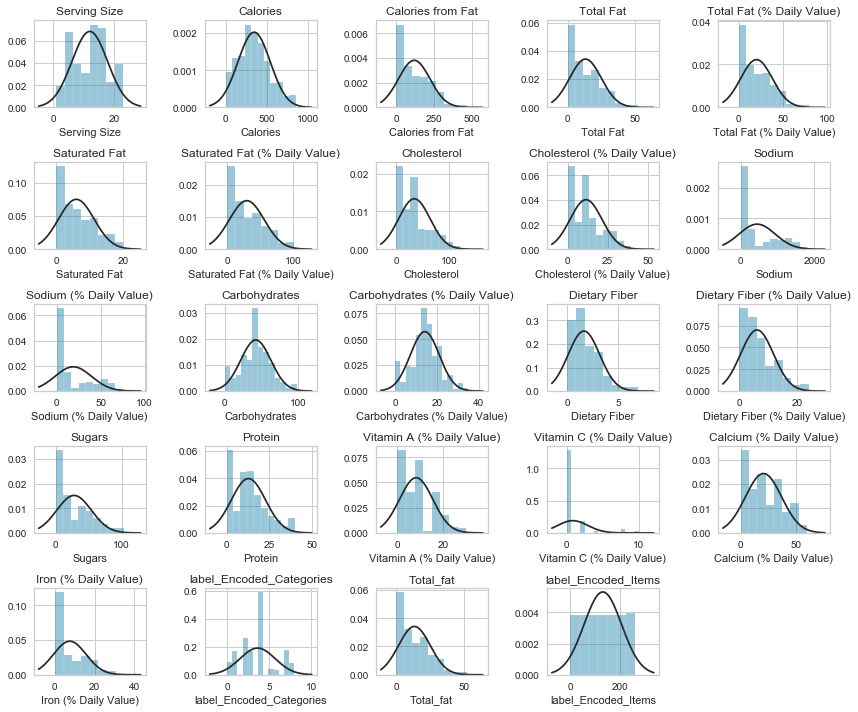

In [71]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =neutrients.drop(["Category","Item","Trans Fat"],axis=1)
list_columns=df.columns
fig, ax = plt.subplots(figsize = (12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(df.iloc[:,i],fit=norm, kde=False,ax=plt.gca())
    #stats.probplot(df.iloc[:,i],dist="norm",plot=plt)
    plt.title(list_columns[i])
    #plt.axis('off')
plt.tight_layout()


### <font color=blue> Normality Test uing QQ plots

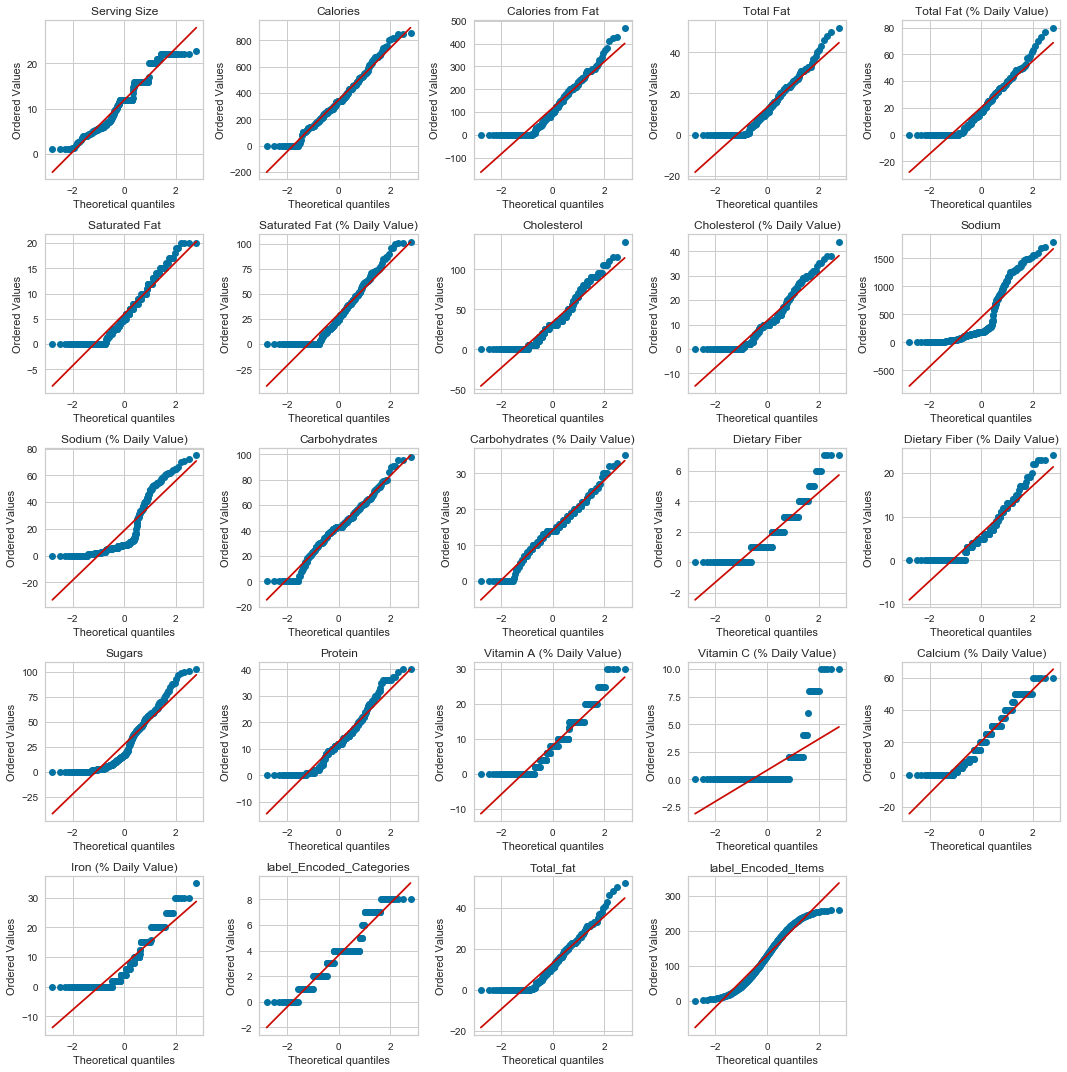

In [72]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =neutrients.drop(["Category","Item","Trans Fat"],axis=1)
list_columns=df.columns
fig, ax = plt.subplots(figsize = (15, 15))
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    stats.probplot(df.iloc[:,i],dist="norm",plot=plt)
    plt.title(list_columns[i])
    #plt.axis('off')
plt.tight_layout()


# <font color=white><center><span style='background:#124080'>  Visualization using Autoviz </span></center> </font>

<!-- ##  Visualization using Autoviz -->

In [73]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (260, 24)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  12
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    24 Predictors classified...
        This does not include the Target column(s)
        6 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


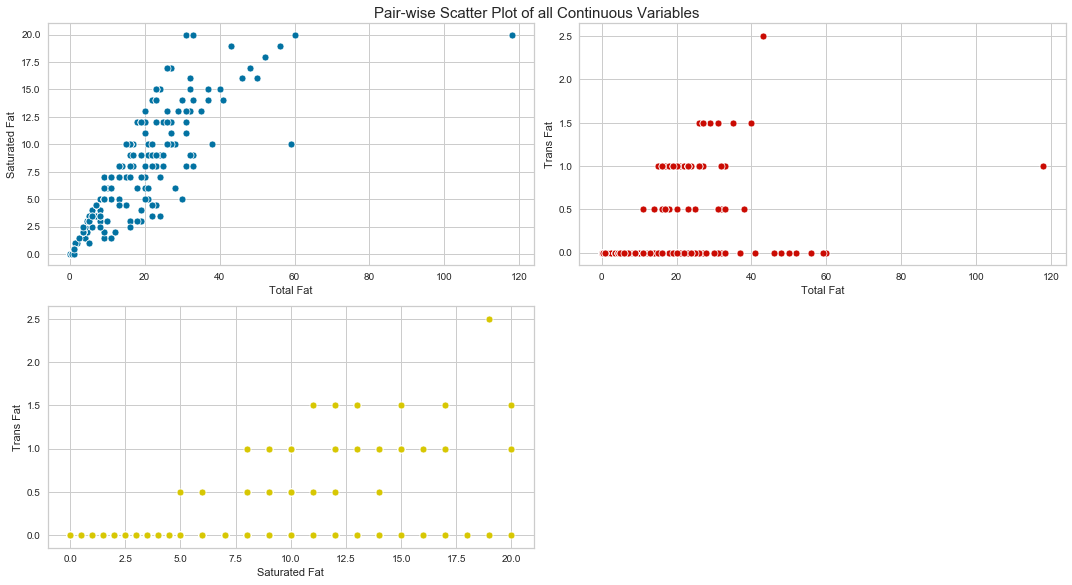

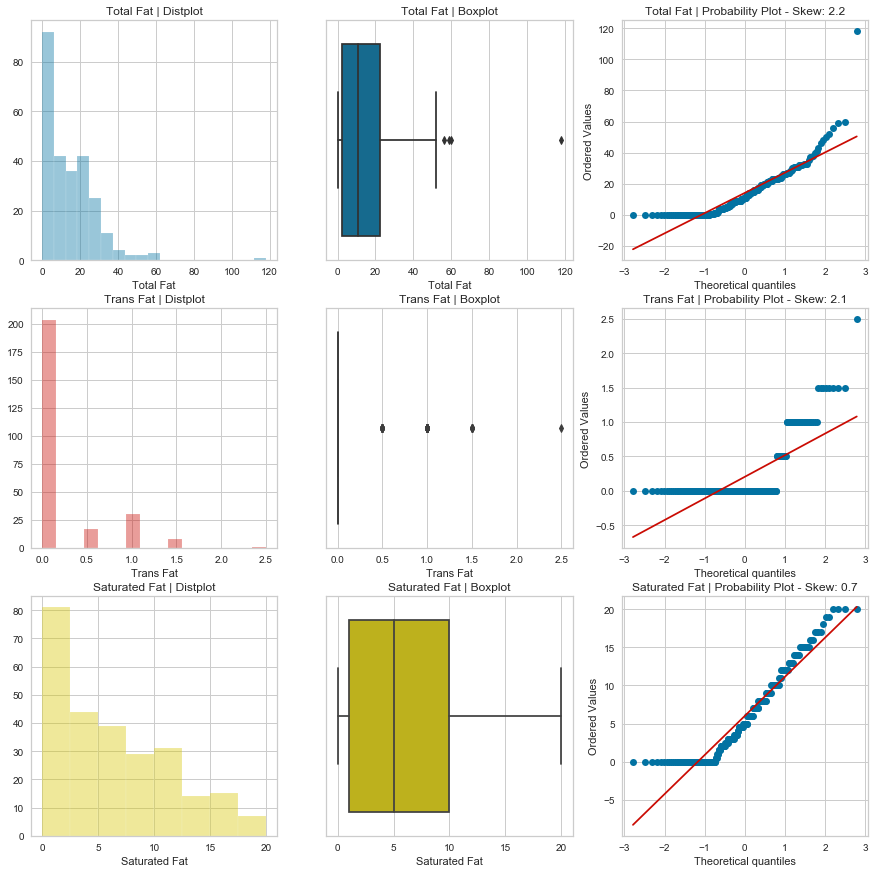

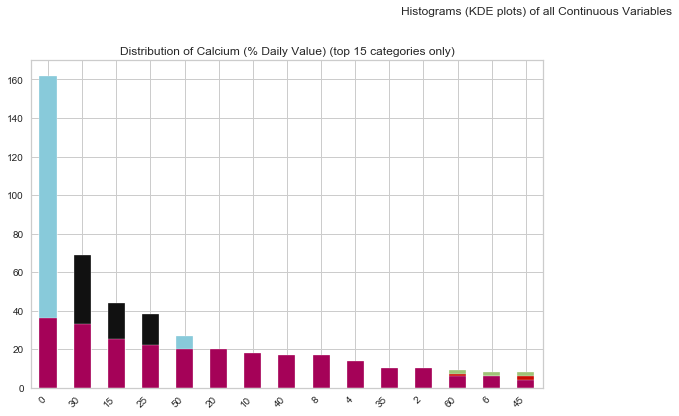

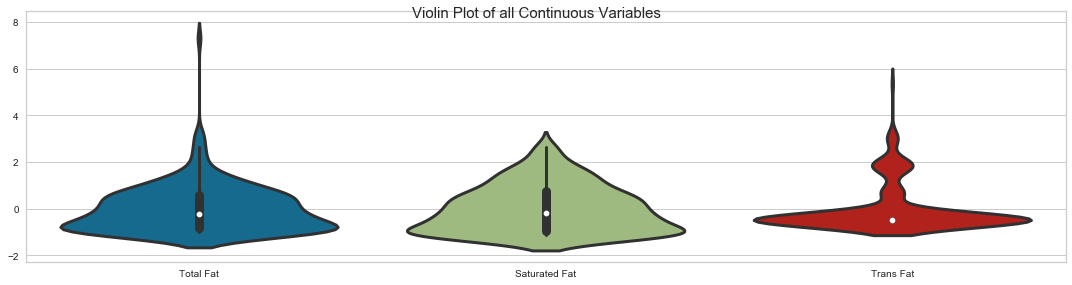

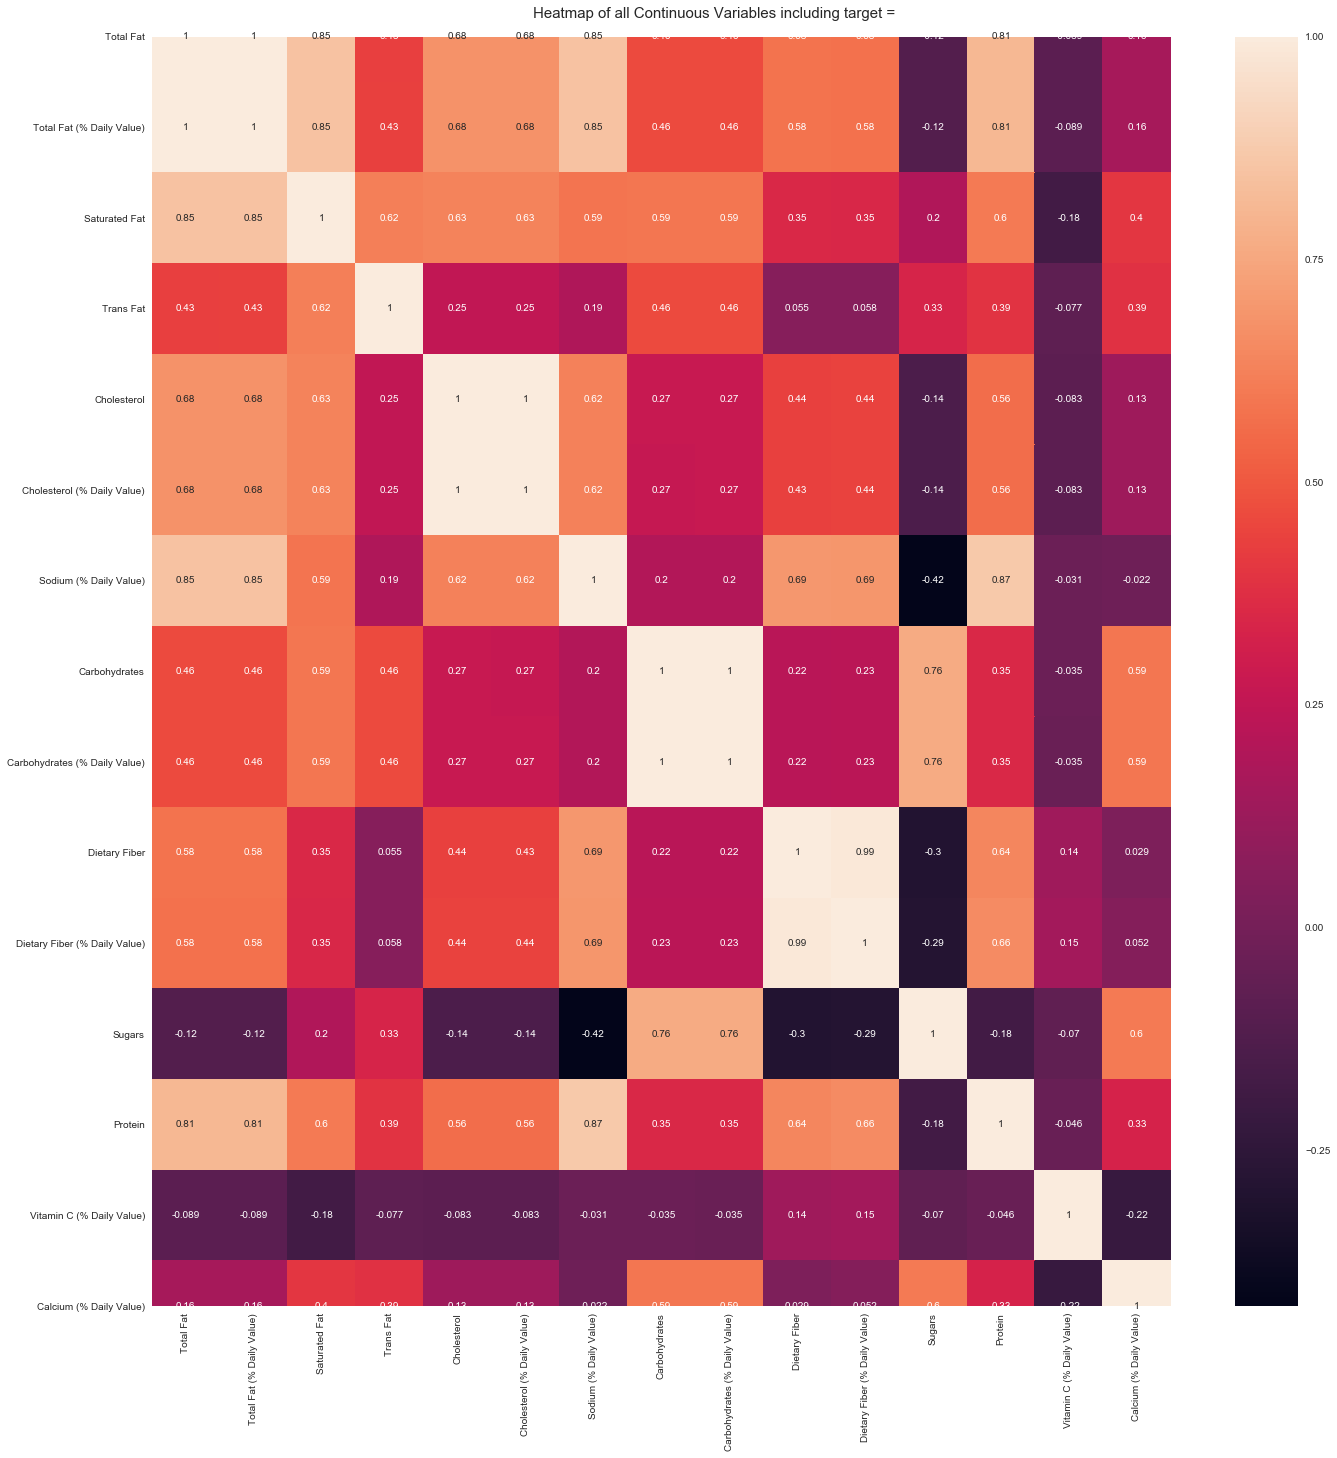

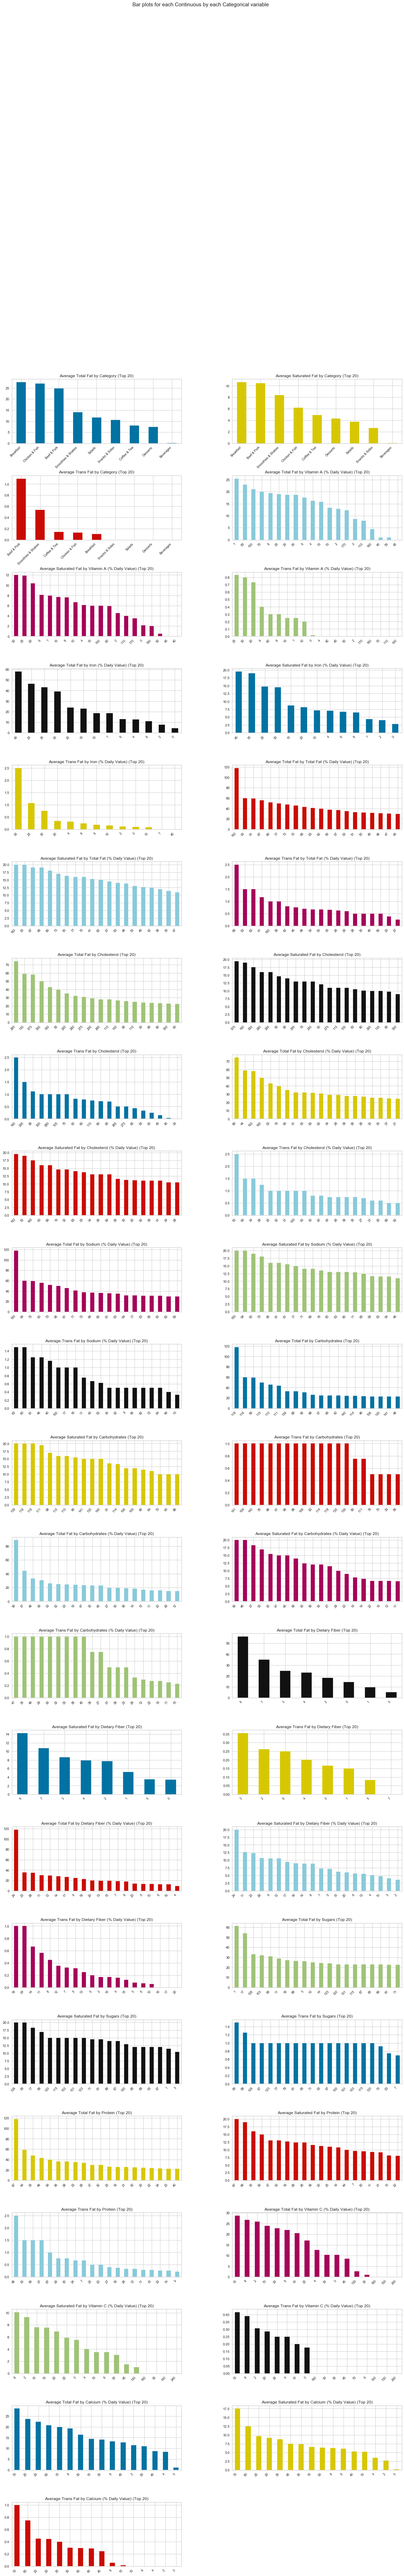

Time to run AutoViz (in seconds) = 69.888

 ###################### VISUALIZATION Completed ########################


Category  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0             Breakfast       13.0                         20            5.0   
1             Breakfast        8.0                         12            3.0   
2             Breakfast       23.0                         35            8.0   
3             Breakfast       28.0                         43           10.0   
4             Breakfast       23.0                         35            8.0   
..                  ...        ...                        ...            ...   
255  Smoothies & Shakes       17.0                         26            9.0   
256  Smoothies & Shakes       23.0                         35           12.0   
257  Smoothies & Shakes       11.0                         17            6.0   
258  Smoothies & Shakes       32.0                         50           15.0   
259  Smoothies & Shakes       16.0                         25            8.0   

     Trans Fat  Cholesterol  Cholesterol (% Daily Value)  \
0          0.0          260                           87   
1          0.0           25                            8   
2          0.0           45                           15   
3          0.0          285                           95   
4          0.0           50                           16   
..         ...          ...                          ...   
255        0.5           45                           14   
256        1.0           55                           19   
257        0.0           30                            9   
258        1.0           60                           20   
259        0.0           30                           10   

     Sodium (% Daily Value)  Carbohydrates  Carbohydrates (% Daily Value)  \
0                        31             31                             10   
1                        32             30                             10   
2                        33             29                             10   
3                        36             30                             10   
4                        37             30                             10   
..                      ...            ...                            ...   
255                      12             80                             27   
256                      16            106                             35   
257                       8             53                             18   
258                      17            114                             38   
259                       8             57                             19   

     Dietary Fiber  Dietary Fiber (% Daily Value)  Sugars  Protein  \
0                4                             17       3       17   
1                4                             17       3       18   
2                4                             17       2       14   
3                4                             17       2       21   
4                4                             17       2       21   
..             ...                            ...     ...      ...   
255              1                              4      64       12   
256              1                              5      85       15   
257              1                              2      43        8   
258              2                              9     103       21   
259              1                              5      51       10   

    Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
0                          10                          0   
1                           6                          0   
2                           8                          0   
3                          15                          0   
4                           6                          0   
..                        ...                        ...   
255                        15                          0   
256                        20                          0   
257                        

In [74]:
AV.AutoViz('neutrional facts.csv')

<font color = blue>
- AutoViz()  provides the visualization of a dataset similar to sweetviz

- It provides

    1) sum of columns based on their datatype
    
    2) Pairwise plots of Variables
    
    3) Distplots, Boxplots and Pobability plots
    
    4) Violin plots of all Continuous variables
    
    5) Heatmap of all Continuous variables
    
    6) Barplots of continuous variables based on categories 

# <font color=white><center><span style='background:#124080'> Clustering Items </span></center> </font>

<!-- ##  Predicting Calories -->


<font color = blue> 
    
- Pre-processing Steps
    
    - 1) Creating copy of dataframe 
    - 2) Creating a Heat map
    - 3) Checking For potential duplicates and dropping them
    - 4) Normalization using Min-Max
   
- Finding K for KMeans using elbow method
 
- Predicting Clusters

     - 1) Finding cluster centers
     - 2) Adding clusters to dataframe
     
- Displaying the clusters

- Verifying the model using Silhouette

- Verifying the model using calinski_harabasz

 
    

### <font color=blue> Step 1- Pre-processing 

In [75]:
neutrient_copy=neutrients.copy()

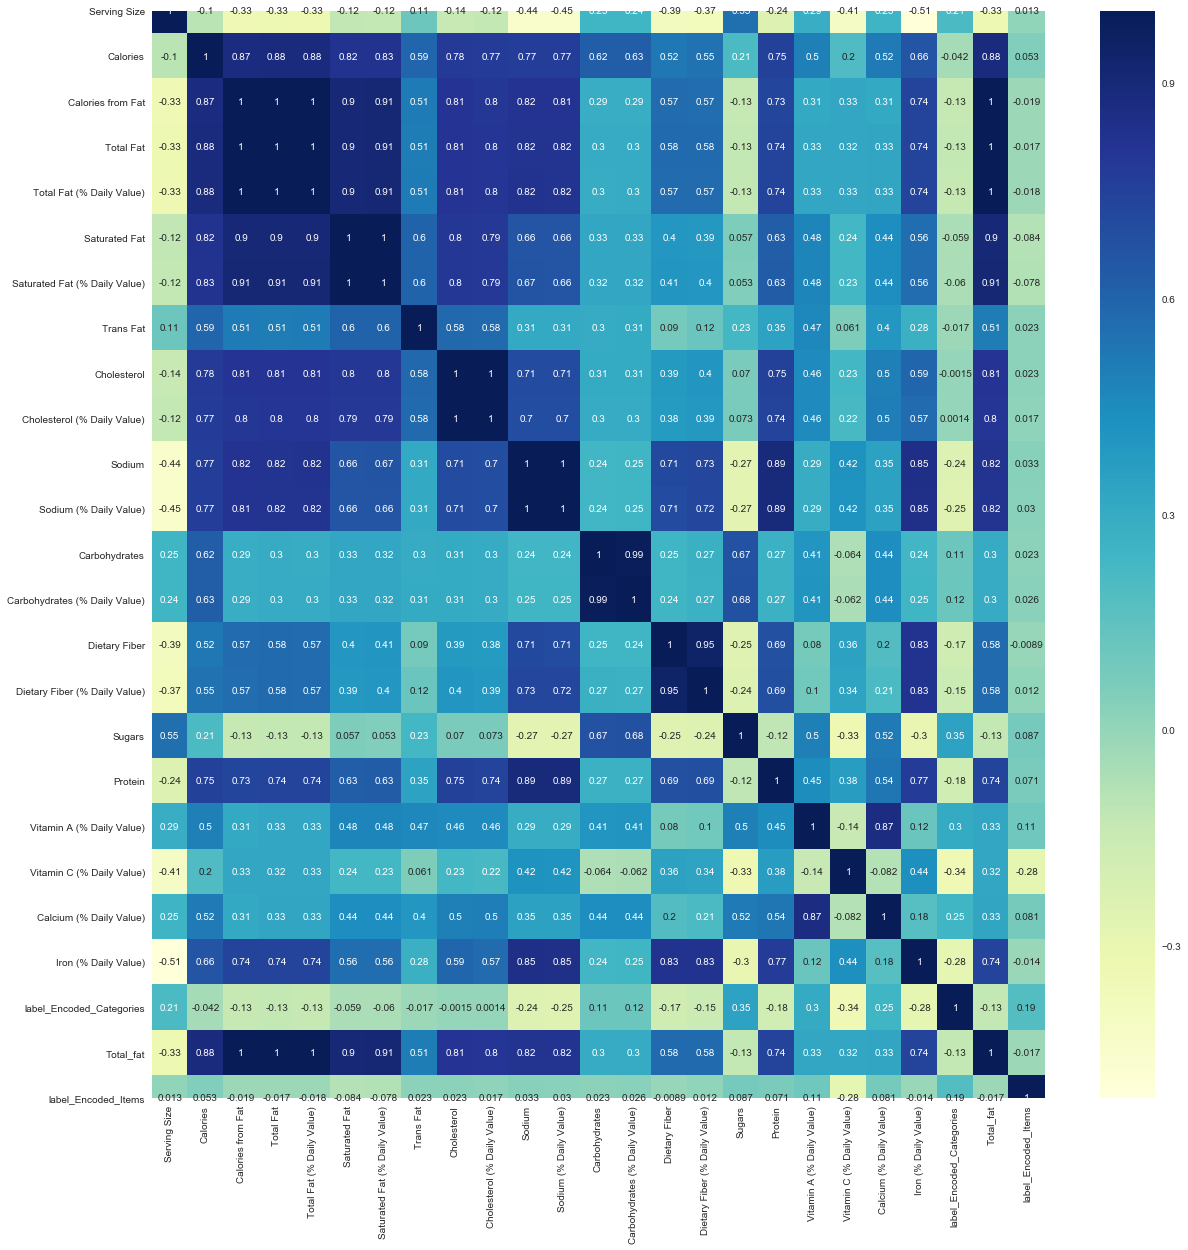

In [76]:
corr=neutrient_copy.corr(method="spearman")
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

<font color=blue>
Checking For potential duplicates

In [77]:
cor_matrix = corr.abs()
upper_triu = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triu.columns if any(upper_triu[column]>0.80) ]
print(to_drop)

['Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Protein', 'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Total_fat']


<font color=blue>
Dropping columns in above cell

In [78]:
neutrient_copy.drop(to_drop,axis=1,inplace=True)

<font color=blue>
Dropping Category and Item because we had label encoded them previously

In [79]:
neutrient_copy.drop(["Category","Item"],axis=1,inplace=True)

### <font color=blue> Normalization of data using Min-Max-Scaler 

In [80]:
scaled_values=neutrient_copy[['label_Encoded_Categories', 'label_Encoded_Items', 'Serving Size', 'Calories', 'Trans Fat',
       'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Vitamin A (% Daily Value)',
       'Vitamin C (% Daily Value)']]

In [81]:
# finding the mean and std deviation of numerical columns
scaler = MinMaxScaler().fit(scaled_values) 
# scaling columns to a common range
data_normalized = scaler.transform(scaled_values)# Scaled data 

In [82]:
normalized_neutrients=pd.DataFrame(data_normalized,index=neutrient_copy.index,columns=scaled_values.columns)

normalized_neutrients.head()

label_Encoded_Categories  label_Encoded_Items  Serving Size  Calories  \
0                      0.25             0.289575      0.174312  0.351101   
1                      0.25             0.293436      0.174312  0.292584   
2                      0.25             0.876448      0.133028  0.433024   
3                      0.25             0.880309      0.215596  0.526651   
4                      0.25             0.884170      0.215596  0.468134   

   Trans Fat  Carbohydrates  Dietary Fiber    Sugars  \
0        0.0       0.316327       0.571429  0.029126   
1        0.0       0.306122       0.571429  0.029126   
2        0.0       0.295918       0.571429  0.019417   
3        0.0       0.306122       0.571429  0.019417   
4        0.0       0.306122       0.571429  0.019417   

   Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  
0                   0.333333                        0.0  
1                   0.200000                        0.0  
2                   0.266667                        0.0  
3                   0.500000                        0.0  
4                   0.200000                        0.0

In [83]:
X=normalized_neutrients.iloc[:,2:]
X

Serving Size  Calories  Trans Fat  Carbohydrates  Dietary Fiber  \
0        0.174312  0.351101        0.0       0.316327       0.571429   
1        0.174312  0.292584        0.0       0.306122       0.571429   
2        0.133028  0.433024        0.0       0.295918       0.571429   
3        0.215596  0.526651        0.0       0.306122       0.571429   
4        0.215596  0.468134        0.0       0.306122       0.571429   
..            ...       ...        ...            ...            ...   
255      0.417431  0.596871        0.2       0.816327       0.142857   
256      0.568807  0.807531        0.4       0.438776       0.142857   
257      0.261468  0.397914        0.0       0.540816       0.142857   
258      0.605505  0.947971        0.4       0.438776       0.285714   
259      0.279817  0.479837        0.0       0.581633       0.142857   

       Sugars  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  
0    0.029126                   0.333333                        0.0  
1    0.029126                   0.200000                        0.0  
2    0.019417                   0.266667                        0.0  
3    0.019417                   0.500000                        0.0  
4    0.019417                   0.200000                        0.0  
..        ...                        ...                        ...  
255  0.621359                   0.500000                        0.0  
256  0.825243                   0.666667                        0.0  
257  0.417476                   0.333333                        0.0  
258  1.000000                   0.666667                        0.0  
259  0.495146                   0.333333                        0.0  

[260 rows x 8 columns]

<font color=blue>
    
    Inference from above 
    
 - In Pre-processing we have done following
  - 1) Creating copy of dataframe
  - 2) Creating a Heat map
  - 3) Checking For potential duplicates and dropping them
  - 4) Normalization using Min-Max - Since Kmean is using distance metric so we are using Normalization to increase effiency

### <font color=blue> Step 2- Elbow Method to find best K for KMeans

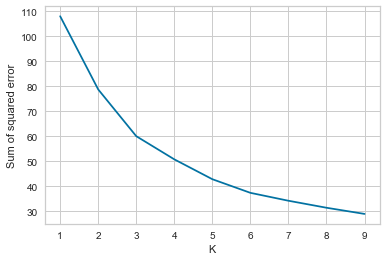

In [84]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

<font color=blue>
From above graph we can observe that our elbow is at 3 and 2 but since error is less at 3 we are taking K as 3

### <font color=blue> Step 3- Predicting Clusters

In [85]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2])

<font color=blue>
cluster centers

In [86]:
km.cluster_centers_

array([[ 5.47933203e-01,  1.77785736e-01, -9.71445147e-17,
         2.65650080e-01,  7.06260032e-02,  2.19046580e-01,
         1.54681648e-01,  1.12359551e-02],
       [ 2.97701789e-01,  5.21517576e-01,  9.89898990e-02,
         4.36198722e-01,  4.37229437e-01,  8.29655781e-02,
         1.96388172e-01,  2.02020202e-01],
       [ 7.24515800e-01,  5.27869894e-01,  1.58333333e-01,
         6.31377551e-01,  1.52777778e-01,  5.90345200e-01,
         5.25925926e-01,  5.55555556e-03]])

<font color=blue> Adding Cluster column to dataframe

In [87]:
normalized_neutrients['cluster']=y_predicted
normalized_neutrients.head()

label_Encoded_Categories  label_Encoded_Items  Serving Size  Calories  \
0                      0.25             0.289575      0.174312  0.351101   
1                      0.25             0.293436      0.174312  0.292584   
2                      0.25             0.876448      0.133028  0.433024   
3                      0.25             0.880309      0.215596  0.526651   
4                      0.25             0.884170      0.215596  0.468134   

   Trans Fat  Carbohydrates  Dietary Fiber    Sugars  \
0        0.0       0.316327       0.571429  0.029126   
1        0.0       0.306122       0.571429  0.029126   
2        0.0       0.295918       0.571429  0.019417   
3        0.0       0.306122       0.571429  0.019417   
4        0.0       0.306122       0.571429  0.019417   

   Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  cluster  
0                   0.333333                        0.0        1  
1                   0.200000                        0.0        1  
2                   0.266667                        0.0        1  
3                   0.500000                        0.0        1  
4                   0.200000                        0.0        1

<font color=blue>
Inference from above step  
  
Since we took K as 3 we are making 3 clusters



### <font color=blue> Step 4- Clusters

In [88]:
cluster0=normalized_neutrients[normalized_neutrients["cluster"]==0].iloc[:,1:]
cluster0

label_Encoded_Items  Serving Size  Calories  Trans Fat  Carbohydrates  \
78              0.162162      0.059633  0.222364        0.0       0.122449   
84              0.733591      0.316514  0.163847        0.0       0.102041   
86              0.741313      0.344037  0.257474        0.0       0.081633   
99              0.528958      0.013761  0.128737        0.0       0.153061   
100             0.903475      0.096330  0.023407        0.0       0.040816   
..                   ...           ...       ...        ...            ...   
217             0.459459      0.504587  0.327694        0.0       0.387755   
220             0.505792      0.504587  0.269177        0.0       0.387755   
235             0.957529      0.504587  0.245770        0.0       0.479592   
236             0.953668      0.688073  0.292584        0.0       0.591837   
257             0.602317      0.261468  0.397914        0.0       0.540816   

     Dietary Fiber    Sugars  Vitamin A (% Daily Value)  \
78        0.142857  0.000000                   0.000000   
84        0.428571  0.038835                   0.266667   
86        0.285714  0.038835                   0.266667   
99        0.142857  0.000000                   0.000000   
100       0.142857  0.019417                   0.266667   
..             ...       ...                        ...   
217       0.000000  0.320388                   0.333333   
220       0.000000  0.320388                   0.333333   
235       0.428571  0.427184                   0.000000   
236       0.428571  0.524272                   0.000000   
257       0.142857  0.417476                   0.333333   

     Vitamin C (% Daily Value)  cluster  
78                         0.2        0  
84                         0.0        0  
86                         0.0        0  
99                         0.0        0  
100                        0.0        0  
..                         ...      ...  
217                        0.0        0  
220                        0.0        0  
235                        0.0        0  
236                        0.0        0  
257                        0.0        0  

[89 rows x 10 columns]

Text(0, 0.5, 'Second Principal Component')

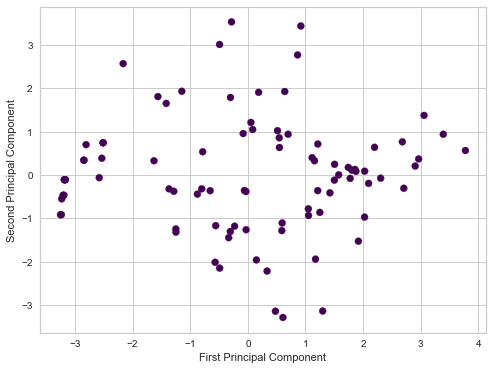

In [137]:
df=normalized_neutrients
df1 = df[df.cluster==0]
scalar = StandardScaler()
# fitting
scalar.fit(df1)
scaled_data = scalar.transform(df1)

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df1['cluster'],cmap="viridis")

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



In [90]:
cluster1=normalized_neutrients[normalized_neutrients["cluster"]==1].iloc[:,1:]
cluster1

label_Encoded_Items  Serving Size  Calories  Trans Fat  Carbohydrates  \
0               0.289575      0.174312  0.351101        0.0       0.316327   
1               0.293436      0.174312  0.292584        0.0       0.306122   
2               0.876448      0.133028  0.433024        0.0       0.295918   
3               0.880309      0.215596  0.526651        0.0       0.306122   
4               0.884170      0.215596  0.468134        0.0       0.306122   
..                   ...           ...       ...        ...            ...   
97              0.617761      0.133028  0.397914        0.0       0.448980   
98              0.536680      0.224771  0.596871        0.0       0.683673   
103             0.061776      0.077982  0.292584        0.0       0.326531   
232             0.108108      0.504587  0.257474        0.0       0.510204   
233             0.104247      0.688073  0.304287        0.0       0.632653   

     Dietary Fiber    Sugars  Vitamin A (% Daily Value)  \
0         0.571429  0.029126                   0.333333   
1         0.571429  0.029126                   0.200000   
2         0.571429  0.019417                   0.266667   
3         0.571429  0.019417                   0.500000   
4         0.571429  0.019417                   0.200000   
..             ...       ...                        ...   
97        0.571429  0.000000                   0.000000   
98        0.714286  0.000000                   0.000000   
103       0.571429  0.126214                   0.133333   
232       0.428571  0.427184                   0.000000   
233       0.571429  0.524272                   0.000000   

     Vitamin C (% Daily Value)  cluster  
0                          0.0        1  
1                          0.0        1  
2                          0.0        1  
3                          0.0        1  
4                          0.0        1  
..                         ...      ...  
97                         0.0        1  
98                         0.0        1  
103                        0.0        1  
232                        0.2        1  
233                        0.4        1  

[99 rows x 10 columns]

Text(0, 0.5, 'Second Principal Component')

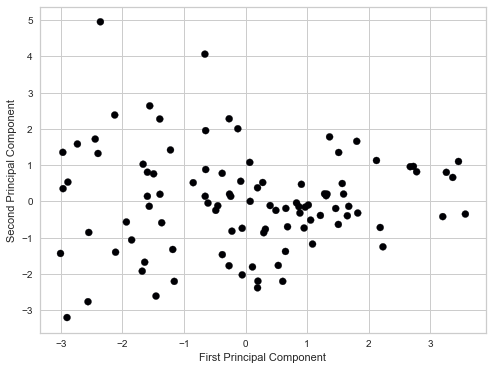

In [134]:
df=normalized_neutrients
df2 = df[df.cluster==1]
scalar = StandardScaler()
# fitting
scalar.fit(df2)
scaled_data = scalar.transform(df2)

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df2['cluster'], cmap ='inferno')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



In [92]:
cluster2=normalized_neutrients[normalized_neutrients["cluster"]==2].iloc[:,2:]
cluster2

Serving Size  Calories  Trans Fat  Carbohydrates  Dietary Fiber  \
112      0.504587  0.327694        0.0       0.775510       0.000000   
120      0.504587  0.315990        0.0       0.734694       0.000000   
128      0.504587  0.327694        0.0       0.755102       0.000000   
135      0.963303  0.327694        0.0       0.663265       0.000000   
152      0.688073  0.397914        0.0       0.510204       0.142857   
..            ...       ...        ...            ...            ...   
254      0.288991  0.503244        0.0       0.653061       0.142857   
255      0.417431  0.596871        0.2       0.816327       0.142857   
256      0.568807  0.807531        0.4       0.438776       0.142857   
258      0.605505  0.947971        0.4       0.438776       0.285714   
259      0.279817  0.479837        0.0       0.581633       0.142857   

       Sugars  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  cluster  
112  0.737864                   0.000000                        0.0        2  
120  0.679612                   0.000000                        0.0        2  
128  0.718447                   0.000000                        0.0        2  
135  0.563107                   0.000000                        0.0        2  
152  0.466019                   0.333333                        0.0        2  
..        ...                        ...                        ...      ...  
254  0.572816                   0.333333                        0.0        2  
255  0.621359                   0.500000                        0.0        2  
256  0.825243                   0.666667                        0.0        2  
258  1.000000                   0.666667                        0.0        2  
259  0.495146                   0.333333                        0.0        2  

[72 rows x 9 columns]

Text(0, 0.5, 'Second Principal Component')

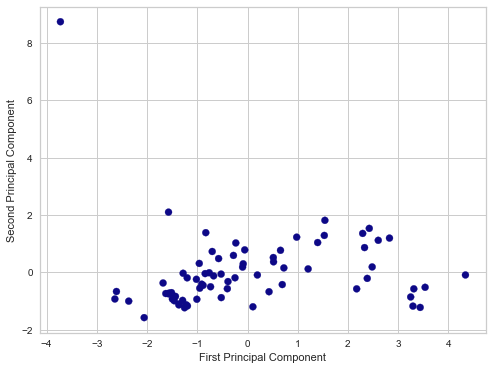

In [130]:
df=normalized_neutrients
df3 = df[df.cluster==2]
scalar = StandardScaler()
# fitting
scalar.fit(df3)
scaled_data = scalar.transform(df3)

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df3['cluster'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



### <font color=blue> Displaying all clusters

Text(0, 0.5, 'Second Principal Component')

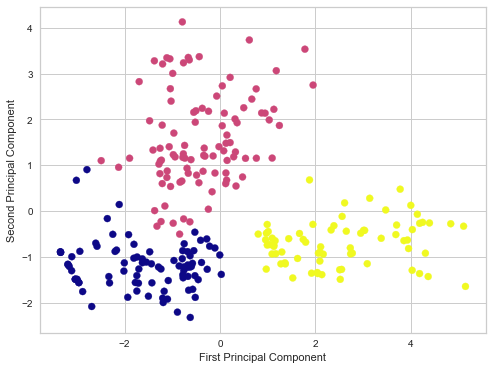

In [126]:
scalar = StandardScaler()
# fitting
scalar.fit(normalized_neutrients)
scaled_data = scalar.transform(normalized_neutrients)

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = normalized_neutrients['cluster'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



### <font color=blue> Step 5- Verifying the model using Silhouette

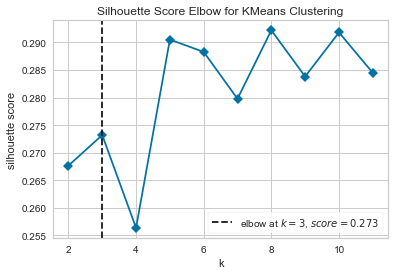

In [95]:
#Double check by the Silhouette score
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

 
<font color=blue> 
    
   - Inference from above code
   - The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### <font color=blue> Step 6- calinski_harabasz

In [96]:
metric.calinski_harabasz_score(X, km.labels_)

102.78607194129252

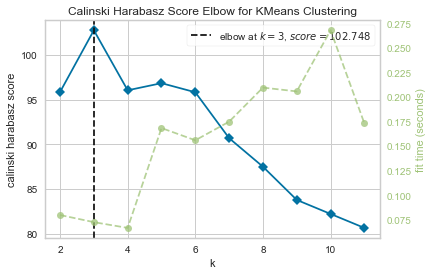

In [97]:
visualizer = KElbowVisualizer(km, k=(2,12), metric='calinski_harabasz', timings=True)

visualizer.fit(X)        
visualizer.show()  

<font color=blue> 
Inference from above
- The Calinski-Harabasz index varies between 0 (worst classification) and infinity(better classification). 

# <font color=white><center><span style='background:#124080'>  Predicting Calories </span></center> </font>

<!-- ##  Predicting Calories -->


<font color = blue> 
    
- Selecting the predictors
    
    - 1) Created pairplot
    - 2) Creating a Heat map
    - 3) Checking higly correlated columns with Calories
   
- Splitting the data
 
- Creating the model

     - 1) Checking Coefficient and intercept
     - 2) Checking Acuuracy of model
     
- Validating Model

     - 1) Validating Linear Assumption
     - 2) Validating normal distribution of errors
     - 3) Validating Homoscedasity principle
     - 4) Calculating the VIF for each attributes

- Checking Model Summary



# <font color=blue> Since Calories is a continous variable we are using a Regression model to predict it



### <font color=blue> Step 1- Deciding the Predictors with Calories as target variable

### <font color=blue> Plotting a Pair plot for checking a linear relationship with Calories

In [98]:
plt.figure(figsize=(25,25))
#sns.pairplot(neutrients)

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

### <font color=blue> Plotting a Pair plot for checking a linear relationship between 'Serving Size', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat','Saturated Fat (% Daily Value)' and Calories

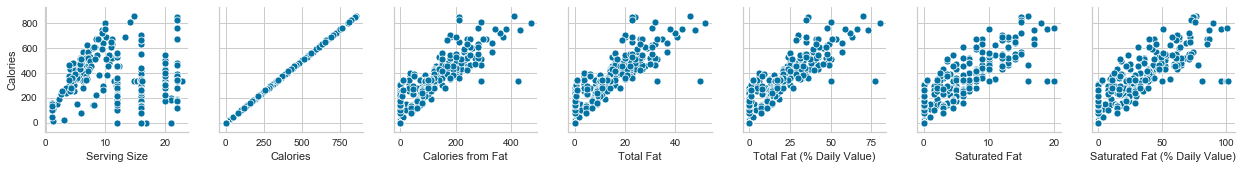

In [99]:
sns.pairplot(x_vars=['Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)'],y_vars=["Calories"],data=neutrients)

### <font color=blue> Plotting a Pair plot for checking a linear relationship between 'Trans Fat', 'Cholesterol', 'Cholesterol(% Daily Value)', 'Sodium', 'Sodium (% Daily Value)','Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars' and Calories

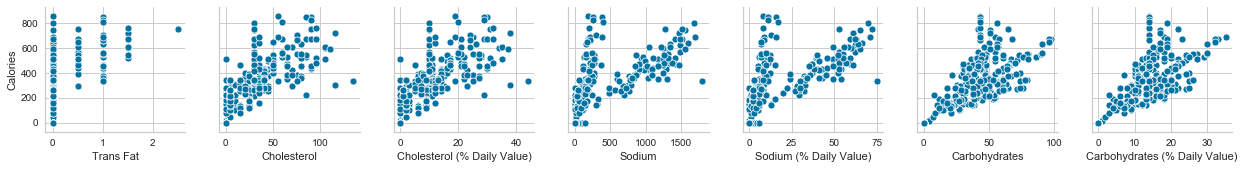

In [100]:
sns.pairplot(x_vars=['Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)'],y_vars="Calories",data=neutrients)

### <font color=blue> Plotting a Pair plot for checking a linear relationship between 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', and Calories

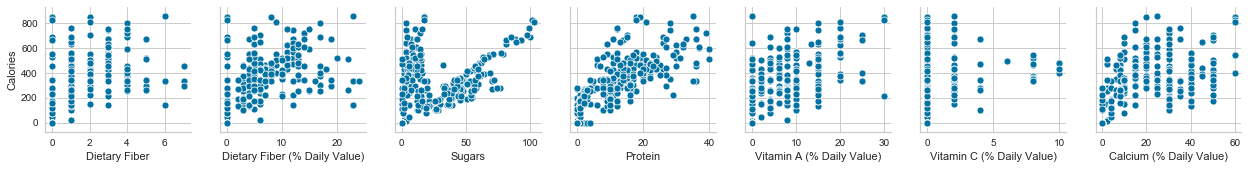

In [101]:
sns.pairplot(x_vars=['Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)'],y_vars="Calories",data=neutrients)

### <font color=blue> Plotting a Pair plot for checking a linear relationship between 'Iron (% Daily Value)','label_Encoded_Categories', 'Total_fat', 'label_Encoded_Items', and Calories

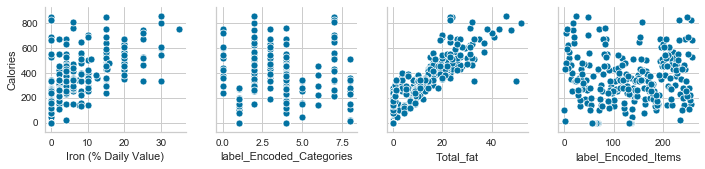

In [102]:
sns.pairplot(x_vars=['Iron (% Daily Value)',
       'label_Encoded_Categories', 'Total_fat', 'label_Encoded_Items'],y_vars="Calories",data=neutrients)

### <font color=blue> Plotting a Heat map for checking a linear relationship with Calories

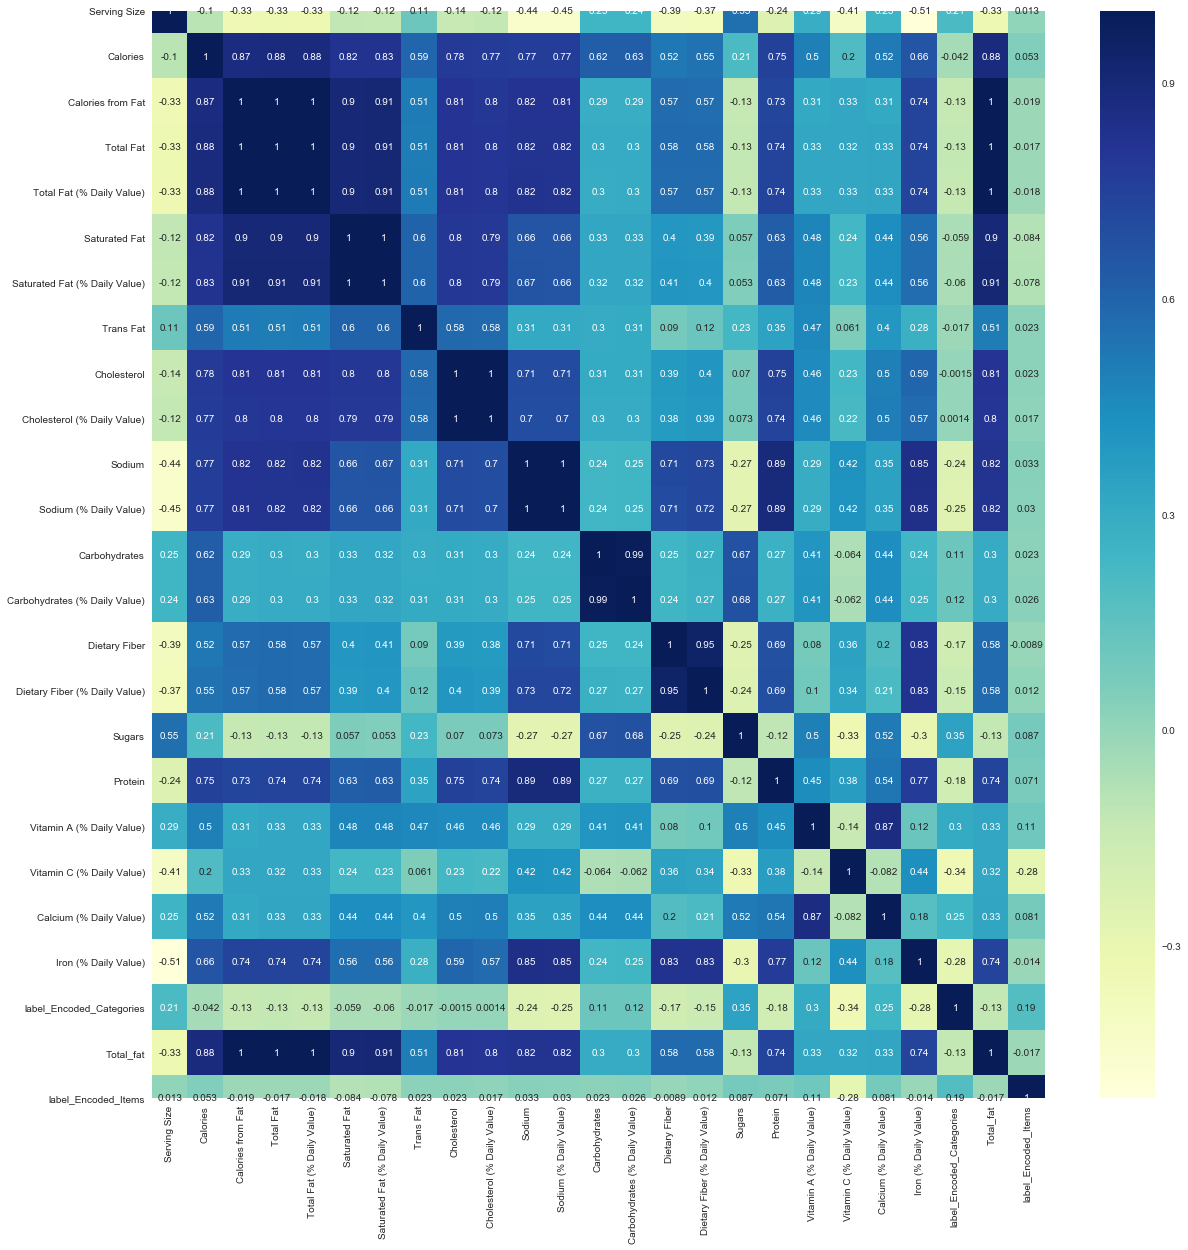

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(neutrients.corr(method="spearman"),cmap="YlGnBu",annot=True)

<font color=blue>
    
By Analysing the heat map and various pairplots we reach at a conclusion that following variables hold a linear relationship   with calories
- Saturated Fat
- Cholesterol
- Total Fat
- Sodium
- Trans Fat

So we are considering above variables as predictors 


In [104]:
features=neutrients[["Saturated Fat","Protein","Cholesterol","Trans Fat","Total Fat"]]
target=neutrients["Calories"]

### <font color=blue> Step 2 - Splitting the Data

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=.35,random_state=100)

<font color=blue> For Splitting we are considering 65% as train data and 35% as test data

### <font color=blue> Step 3-  Creating and training a Multiple Linear Regression Model

In [106]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 <font color=blue> Checking the Coeff and Intercept values

In [107]:
print("Coefficient :",model.coef_)

Coefficient : [10.55310679  3.91660157  0.82608794 41.94731466  5.06949469]


In [108]:
print("Intercept :",model.intercept_)

Intercept : 124.87318824693483


 <font color=blue> Checking Accuracy of model with training and testing data

In [109]:
print("Training Accuracy =",model.score(X_train,Y_train))
print("Testing Accuracy =",model.score(X_test,Y_test))

Training Accuracy = 0.7712287881654467
Testing Accuracy = 0.7585482009344386


### <font color=blue> Step 4- Validating Model

### <font color=blue> Validating Linear Assumption

In [110]:
prediction=model.predict(features)

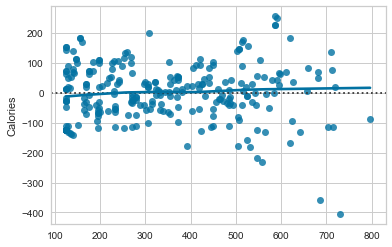

In [111]:
sns.residplot(prediction.reshape(-1),neutrients["Calories"],lowess=True)

<font color=blue>
    
   - Inference from above graph
   - By Analysing the above graph we can say that predictors have a linear relationship with target as no particular pattern is observed

### <font color=blue> Validating normal distribution of errors

Text(0.5, 1.0, 'Normal Q-Q Plot')

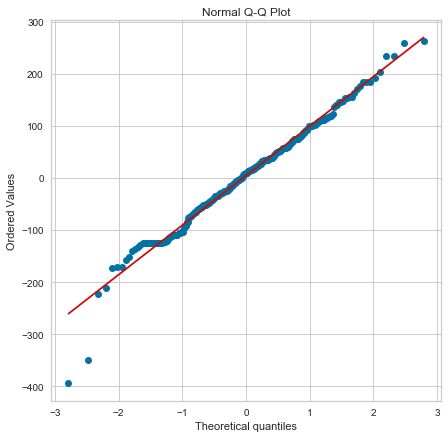

In [112]:
from scipy import stats
residual_error=neutrients['Calories']-prediction.reshape(-1)
plt.figure(figsize=(7,7))
stats.probplot(residual_error, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")

<font color=blue>

For the above data set, the Q-Q plot of the residuals of the best fit model (shown below) indicates the adherence to normality assumption since the residual points are close to the normal line.

### <font color=blue> Validating Homoscedasity principle

Text(0.5, 0, 'Fitted value')

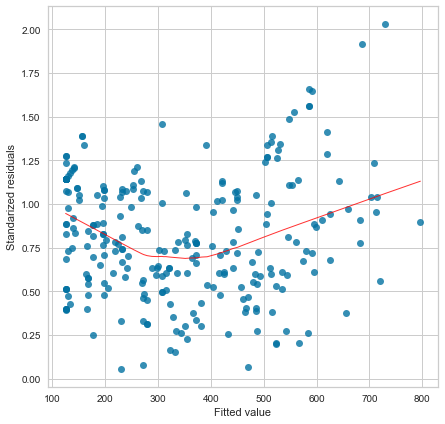

In [113]:
sd=np.sqrt(np.sum(np.square(residual_error))/(residual_error.size-2))

# standardised residuals
sd_error=residual_error/sd
sq_abs_sd_err=np.sqrt(np.abs(sd_error))
plt.figure(figsize=(7,7))
sns.regplot(prediction.reshape(-1), sq_abs_sd_err,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

<font color=blue>
The linear regression model is said to abide by the homoscedasticity assumption if there is no specific pattern observed in the scale-location plot. The scale-location plot of the best fit model for the computer repairs data set is as shown below.

### <font color=blue> Calculating the VIF for each attributes


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(features.values,idx) 
           for idx in range(features.shape[1])],
          index=features.columns)
print(vif)


Saturated Fat     9.899808
Protein           6.642182
Cholesterol       6.757722
Trans Fat         2.252238
Total Fat        11.065412
dtype: float64


<font color=blue>
From above we can say predictors are not highly correlated

### <font color=blue> Step 5- Checking Model Summary


In [115]:
import statsmodels.api as sm

In [116]:
x=sm.add_constant(features)
y=target

In [117]:
model_summ=sm.OLS(y,x).fit()

In [118]:
model_summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     172.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           1.65e-79
Time:                        10:40:39   Log-Likelihood:                -1550.3
No. Observations:                 260   AIC:                             3113.
Df Residuals:                     254   BIC:                             3134.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           133.3805     10.236     13.030      0.000     113.221     153.540
Saturated Fat     6.0031      2.383      2.519      0.012       1.311      10.696
Protein           2.9210      0.973      3.001      0.003       1.004       4.838
Cholesterol       0.7990      0.341      2.344      0.020       0.128       1.470
Trans Fat        69.1327     19.026      3.634      0.000      31.664     106.601
Total Fat         7.4384      1.116      6.667      0.000       5.241       9.636
==============================================================================
Omnibus:                       13.079   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.338
Skew:                          -0.282   Prob(JB):                     1.41e-05
Kurtosis:                       4.321   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""